In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning )

In [9]:
rel_ref = './kaggle/input/brazilian-ecommerce/' # then + file name
olist_customers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
olist_geolocation_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

In [10]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Order table Anlaysis.

In [11]:
olist_orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [12]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [13]:
olist_orders_dataset.value_counts('order_status')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

<Axes: xlabel='order_purchase_timestamp'>

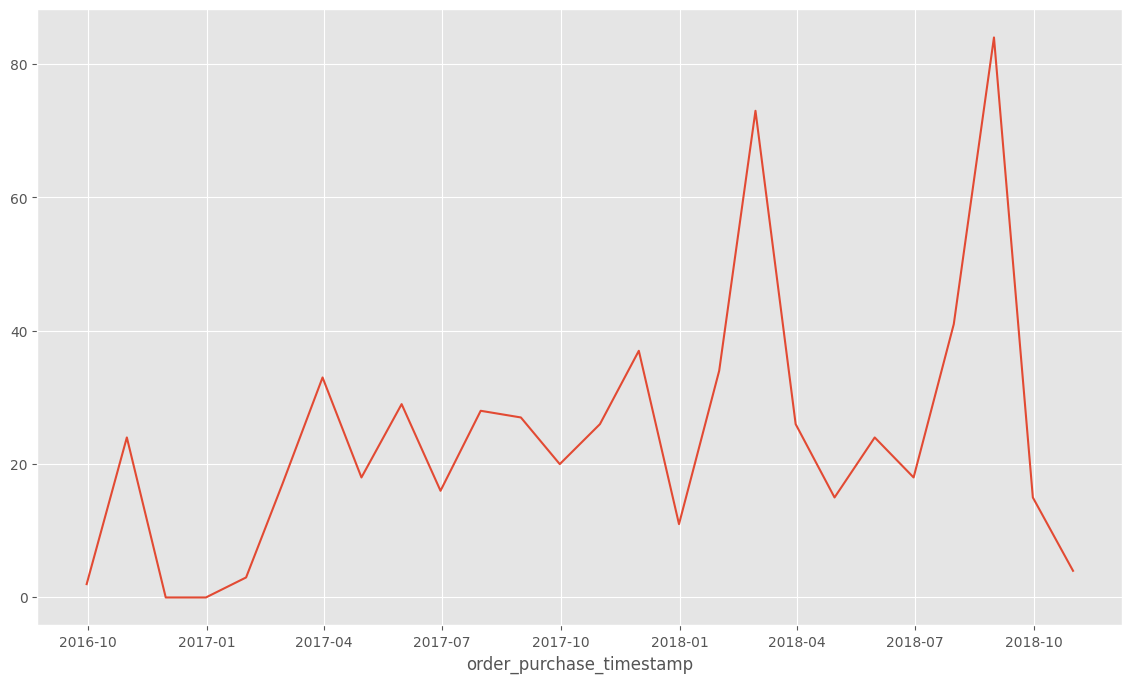

In [14]:
canceled_orders = olist_orders_dataset[olist_orders_dataset['order_status'] == 'canceled'] ## unavailable,canceled.
### There are some orders which get canceled because of unavailability or by some other reason.
canceled_orders = canceled_orders.groupby(pd.Grouper(key='order_purchase_timestamp', freq='ME')).size()
plt.figure(figsize=(14,8))
sns.lineplot(data=canceled_orders)

There is not much trend very few order are getting canceled and the number is increasing because the total numbers of orders also increasing.

In [15]:
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

In [16]:
olist_orders_dataset.reset_index(inplace=True)

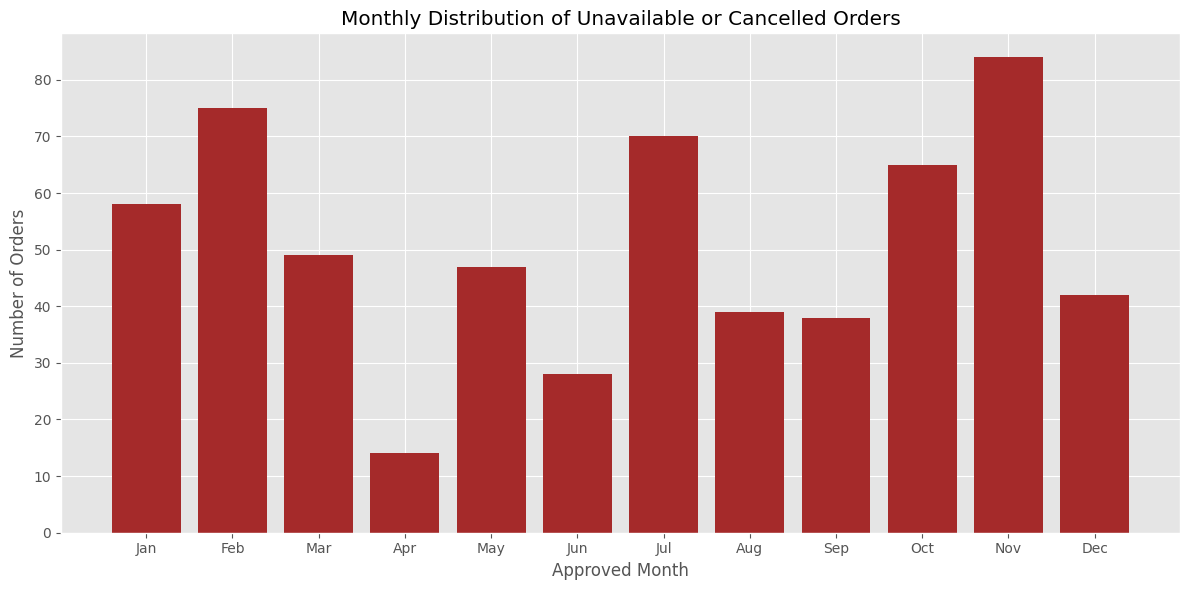

In [17]:

unavailable_or_cancelled_orders = olist_orders_dataset[
    (olist_orders_dataset['order_status'] == 'unavailable') | 
    (olist_orders_dataset['order_status'] == 'cancelled')
].copy() 

unavailable_or_cancelled_orders['approved_month'] = unavailable_or_cancelled_orders['order_purchase_timestamp'].dt.month

# Count the values for each month
month_counts = unavailable_or_cancelled_orders['approved_month'].value_counts().reset_index()
month_counts.columns = ['approved_month', 'count']
month_counts = month_counts.sort_values('approved_month')  # Ensure the months are sorted

# Plot the results
plt.figure(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(month_counts['approved_month'], month_counts['count'], color='brown', linewidth=3)
plt.xticks(ticks=range(1, 13), labels=months, rotation=0, fontsize=10)
plt.title('Monthly Distribution of Unavailable or Cancelled Orders')
plt.xlabel('Approved Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [18]:
unavailable_or_cancelled_orders

index                          order_id  \
266      266  8e24261a7e58791d10cb1bf9da94df5c   
586      586  c272bcd21c287498b4883c7512019702   
687      687  37553832a3a89c9b2db59701c357ca67   
737      737  d57e15fb07fd180f06ab3926b39edcd2   
1160    1160  2f634e2cebf8c0283e7ef0989f77d217   
...      ...                               ...   
99147  99147  6cf5c427fb11bc5fe8abefa86aa7ba0b   
99233  99233  1c7c8ab324927f5b6e52338bd110bef4   
99252  99252  aaab15da689073f8f9aa978a390a69d1   
99348  99348  a69ba794cc7deb415c3e15a0a3877e69   
99415  99415  5fabc81b6322c8443648e1b21a6fef21   

                            customer_id order_status order_purchase_timestamp  \
266    64a254d30eed42cd0e6c36dddb88adf0  unavailable      2017-11-16 15:09:28   
586    9582c5bbecc65eb568e2c1d839b5cba1  unavailable      2018-01-31 11:31:37   
687    7607cd563696c27ede287e515812d528  unavailable      2017-08-14 17:38:02   
737    470b93b3f1cde85550fc74cd3a476c78  unavailable      2018-01-08 19:39:03   
1160   7353b0fb8e8d9675e3a704c60ca44ebe  unavailable      2017-09-27 20:55:33   
...                                 ...          ...                      ...   
99147  91ac14a1e50bc022eeecf0c2ba37006a  unavailable      2017-10-17 10:53:48   
99233  95b1767df51d6fa09402267d8de314df  unavailable      2017-12-23 18:48:09   
99252  df20748206e4b865b2f14a5eabbfcf34  unavailable      2018-01-16 14:27:59   
99348  726f0894b5becdf952ea537d5266e543  unavailable      2017-08-23 16:28:04   
99415  32c9df889d41b0ee8309a5efb6855dcb  unavailable      2017-10-10 10:50:03   

         order_approved_at order_delivered_carrier_date  \
266    2017-11-16 15:26:57                          NaN   
586    2018-01-31 14:23:50                          NaN   
687    2017-08-17 00:15:18                          NaN   
737    2018-01-09 07:26:08                          NaN   
1160   2017-09-28 01:32:50                          NaN   
...                    ...                          ...   
99147  2017-10-19 03:12:43                          NaN   
99233  2017-12-23 18:54:22                          NaN   
99252  2018-01-17 03:37:34                          NaN   
99348  2017-08-28 15:44:47                          NaN   
99415  2017-10-14 18:35:57                          NaN   

      order_delivered_customer_date order_estimated_delivery_date  \
266                             NaN           2017-12-05 00:00:00   
586                             NaN           2018-02-16 00:00:00   
687                             NaN           2017-09-05 00:00:00   
737                             NaN           2018-02-06 00:00:00   
1160                            NaN           2017-10-27 00:00:00   
...                             ...                           ...   
99147                           NaN           2017-10-27 00:00:00   
99233                           NaN           2018-01-19 00:00:00   
99252                           NaN           2018-02-06 00:00:00   
99348                           NaN           2017-09-15 00:00:00   
99415                           NaN           2017-10-23 00:00:00   

       approved_month  
266                11  
586                 1  
687                 8  
737                 1  
1160                9  
...               ...  
99147              10  
99233              12  
99252               1  
99348               8  
99415              10  

[609 rows x 10 columns]

In [19]:
filter1 = olist_orders_dataset['order_purchase_timestamp'] > '2016-12-31'
filter2 = olist_orders_dataset['order_purchase_timestamp'] < '2018-09-1'
filter3 = ~olist_orders_dataset['order_status'].isin(['unavailable' ,'canceled'])  ## not in condition
olist_orders_dataset = olist_orders_dataset[(filter1 & filter2 & filter3)] ### order between 2017 and 2018 and ordered.
print('numbers of orders : ', olist_orders_dataset.shape[0])
print('first order : '  , olist_orders_dataset['order_purchase_timestamp'].min())
print('last order : ' , olist_orders_dataset['order_purchase_timestamp'].max())

numbers of orders :  97910
first order :  2017-01-05 11:56:06
last order :  2018-08-29 15:00:37


In [20]:
# Grouping by month
monthly_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='ME')).size()
monthly_data ## montly orders

order_purchase_timestamp
2017-01-31     787
2017-02-28    1718
2017-03-31    2617
2017-04-30    2377
2017-05-31    3640
2017-06-30    3205
2017-07-31    3946
2017-08-31    4272
2017-09-30    4227
2017-10-31    4547
2017-11-30    7423
2017-12-31    5620
2018-01-31    7187
2018-02-28    6625
2018-03-31    7168
2018-04-30    6919
2018-05-31    6833
2018-06-30    6145
2018-07-31    6233
2018-08-31    6421
Freq: ME, dtype: int64

<Axes: xlabel='order_purchase_timestamp'>

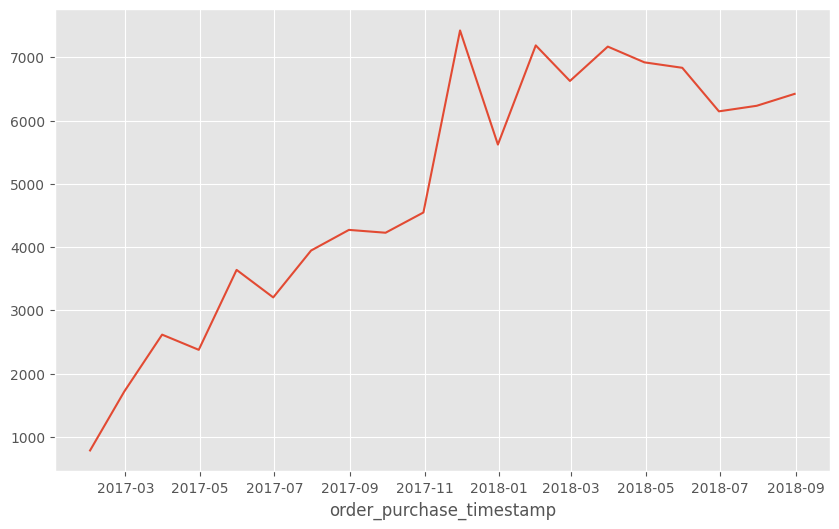

In [21]:
plt.figure(figsize=( 10,6 ) )
sns.lineplot(data=monthly_data )
# sns.regplot( x=monthly_data.index, =y, scatter=False, color='red' )

In [22]:
# olist_orders_dataset['order_status'].value_counts()
# monthly_order_data = olist_orders_dataset.groupby('order_status').agg({'order_id':'count'})
# plt.figure(figsize=(15, 8))
# sns.barplot(x='approved_month', y='count', data=monthly_order_data.astype(int), palette=['brown'], linewidth=2, ci=None)
# plt.title('Monthly Orders Over Time', color='white')
# plt.xlabel('Months', color='white')
# plt.ylabel('Number of Orders', color='white')
# plt.show()

**Insights:** 
* There is some sudden spike in the orders in the end of the year 2017.
* Numbers of orders geting saturated in the year 2018.


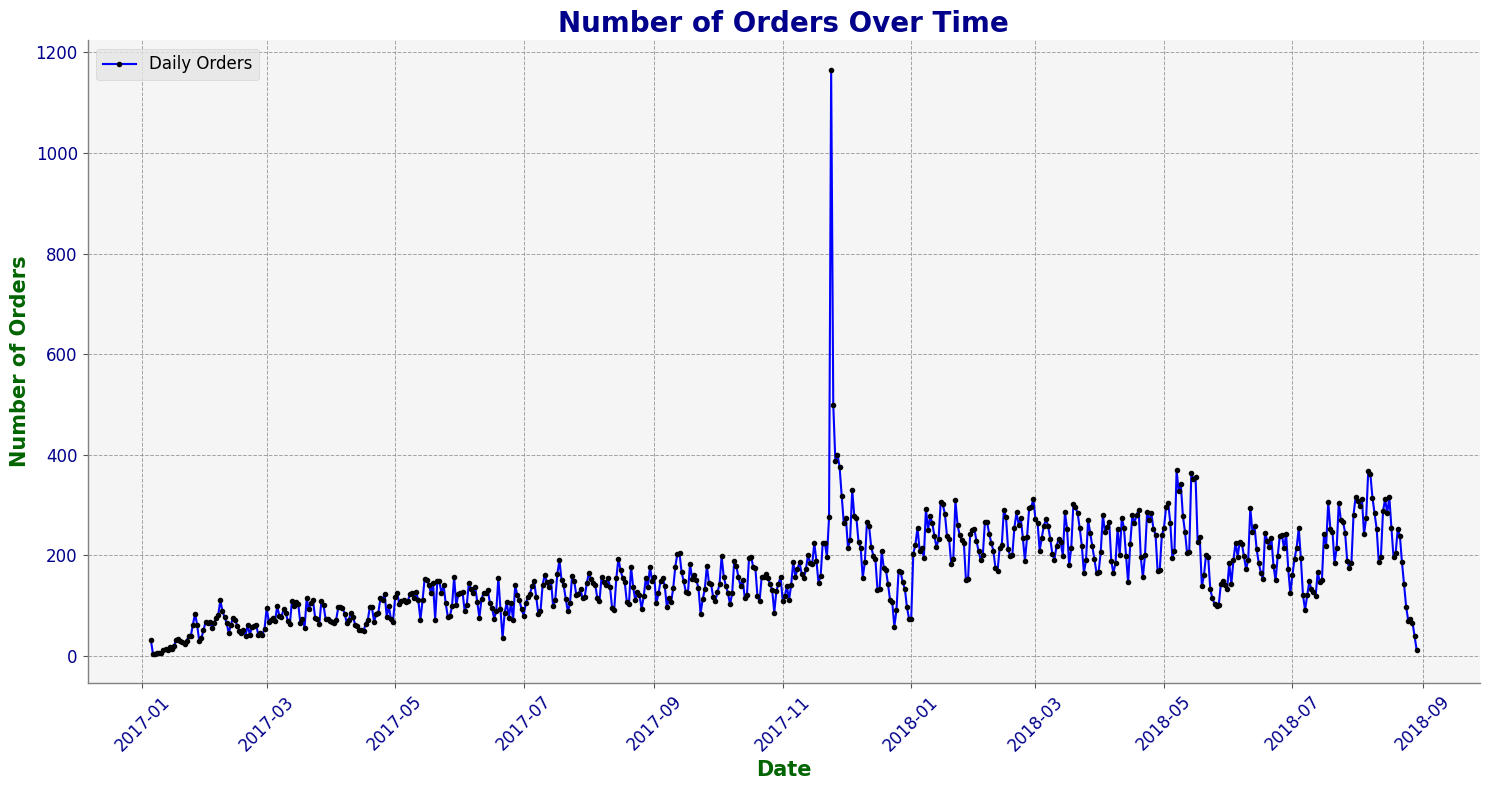

In [23]:
# import plotly.express as px
# daily_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D')).size()
# # fig = px.line(daily_data, title='Sales over Time' , color_discrete_sequence=['blue'], line_dash='dash' )
# fig = px.line(daily_data, title='Sales over Time')


# fig.update_layout(
#     width=1200,  # Set the width of the plot
#     height=700,  # Set the height of the plot
#     xaxis_title="Date",
#     yaxis_title="Value",
#     font=dict(
#         family="Arial",
#         size=12,
#         color="black"
#     )
# )
# fig.show()



daily_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D')).size().reset_index(name='count')

# # Plot using Seaborn
# plt.figure(figsize=(15, 8))

# # Line plot with markers
# sns.lineplot(data=daily_data, x='order_purchase_timestamp', y='count', color='blue', linestyle='-', marker='o', markersize=6, markerfacecolor='red', markeredgewidth=2, markeredgecolor='black')

# # Customize the plot
# plt.title('Sales over Time', fontsize=20, fontweight='bold', color='darkblue')
# plt.xlabel('Date', fontsize=15, fontweight='bold', color='darkgreen')
# plt.ylabel('Value', fontsize=15, fontweight='bold', color='darkgreen')
# plt.xticks(rotation=45, fontsize=12, color='darkblue')
# plt.yticks(fontsize=12, color='darkblue')
# plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha=0.7)
# plt.gca().set_facecolor('whitesmoke')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_color('grey')
# plt.gca().spines['bottom'].set_color('grey')

# # Adding a legend
# plt.legend(['Daily Sales'], loc='upper left', fontsize=12)

# # Adjust the layout
# plt.tight_layout()

# # Show the plot
# plt.show()



# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Sample DataFrame (replace this with your actual DataFrame)
# olist_orders_dataset = pd.DataFrame({
#     'order_purchase_timestamp': pd.date_range(start='2023-01-01', periods=200, freq='D'),
#     'order_id': range(1, 201)
# })

# # Group data by day and count the orders
# daily_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D')).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(15, 8))

# Line plot with markers
sns.lineplot(data=daily_data, x='order_purchase_timestamp', y='count', color='blue', linestyle='-', marker='o', markersize=2, markerfacecolor='red', markeredgewidth=2, markeredgecolor='black')

# Customize the plot
plt.title('Number of Orders Over Time', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Orders', fontsize=15, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Adding a legend
plt.legend(['Daily Orders'], loc='upper left', fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



In [24]:
daily_data

order_purchase_timestamp  count
0                 2017-01-05     32
1                 2017-01-06      4
2                 2017-01-07      4
3                 2017-01-08      6
4                 2017-01-09      5
..                       ...    ...
597               2018-08-25     69
598               2018-08-26     73
599               2018-08-27     66
600               2018-08-28     39
601               2018-08-29     11

[602 rows x 2 columns]

In [25]:
daily_data.to_excel(file_path, index=True)

NameError: name 'file_path' is not defined

### **Insight:** 
After some Reasearch I got to know that it was Black Friday sale on the 24th Nov 2017, And we can see there is increasing number of sales in 2017 and it gets saturated in the 2018.

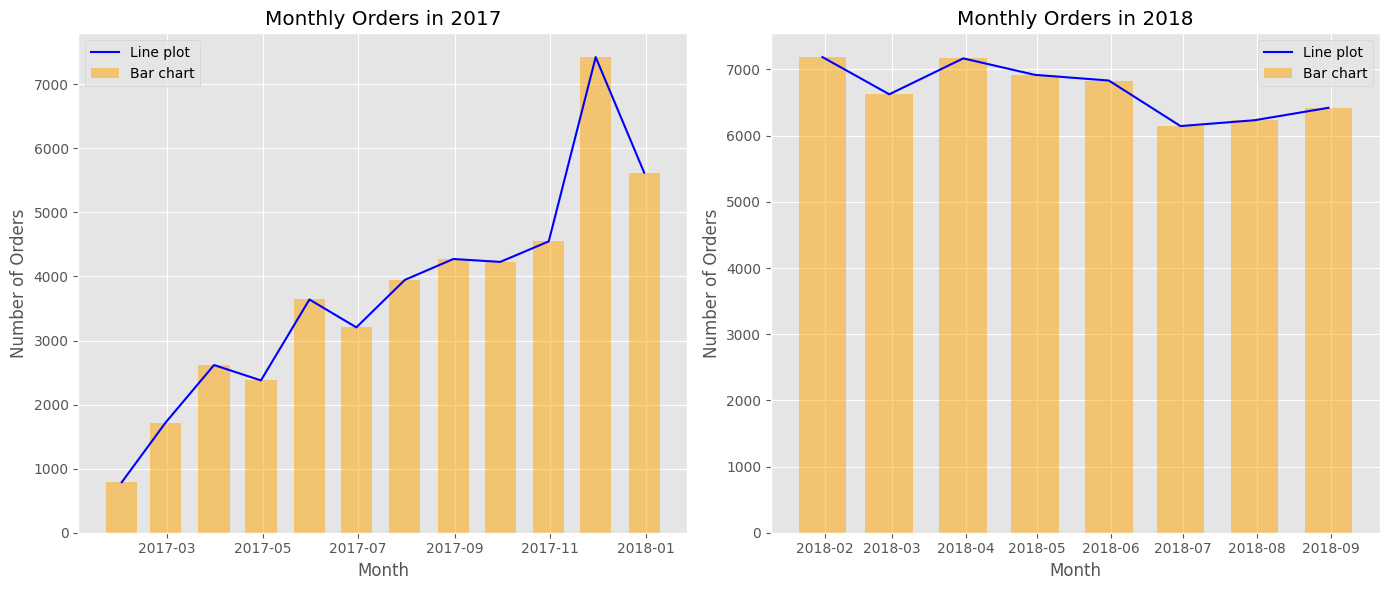

In [26]:
import matplotlib.pyplot as plt

Year_2017 = olist_orders_dataset['order_purchase_timestamp'].dt.year == 2017
Monthly_orders_2017  = olist_orders_dataset[Year_2017].groupby(pd.Grouper(key='order_purchase_timestamp', freq='ME')).size()
Year_2018 = olist_orders_dataset['order_purchase_timestamp'].dt.year == 2018
Monthly_orders_2018  = olist_orders_dataset[Year_2018].groupby(pd.Grouper(key='order_purchase_timestamp', freq='ME')).size()

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 2017
axs[0].plot(Monthly_orders_2017.index, Monthly_orders_2017.values, color='blue', label='Line plot')
axs[0].bar(Monthly_orders_2017.index, Monthly_orders_2017.values, width=20, color='orange', alpha=0.5, label='Bar chart')
axs[0].set_title('Monthly Orders in 2017')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Orders')
axs[0].legend()

# Plot for 2018
axs[1].plot(Monthly_orders_2018.index, Monthly_orders_2018.values, color='blue', label='Line plot')
axs[1].bar(Monthly_orders_2018.index, Monthly_orders_2018.values,  width = 20 , color='orange', alpha=0.5, label='Bar chart')
axs[1].set_title('Monthly Orders in 2018')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Orders')
axs[1].legend()                                                                       

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [27]:
Monthly_orders_2017

order_purchase_timestamp
2017-01-31     787
2017-02-28    1718
2017-03-31    2617
2017-04-30    2377
2017-05-31    3640
2017-06-30    3205
2017-07-31    3946
2017-08-31    4272
2017-09-30    4227
2017-10-31    4547
2017-11-30    7423
2017-12-31    5620
Freq: ME, dtype: int64

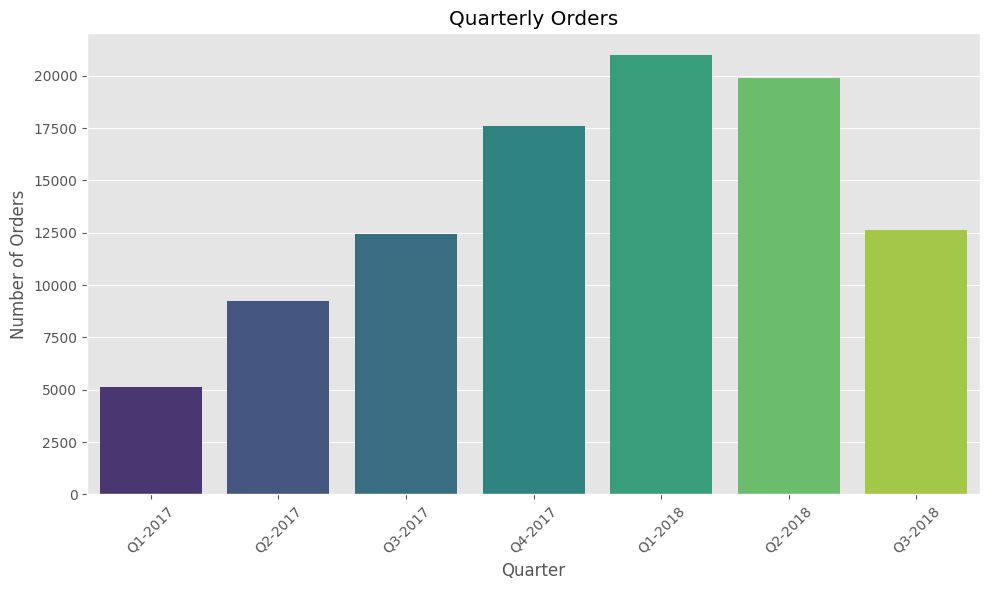

In [28]:
quarter_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='Q')).size()
formatted_dates = [f"Q{(date.month - 1) // 3 + 1}-{date.year}" for date in quarter_data.index]
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=formatted_dates, y=quarter_data.values, palette="viridis")


# Manually adjust width and gap
total_bars = len(quarter_data)
bar_width = 0.5  # Adjust the width of bars
gap_width = 0.5  # Adjust the gap between bars


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.title('Quarterly Orders')
# Manually set positions for xticks


plt.xticks([gap_width * i + bar_width * i for i in range(total_bars)], formatted_dates)
plt.tight_layout()
plt.show()

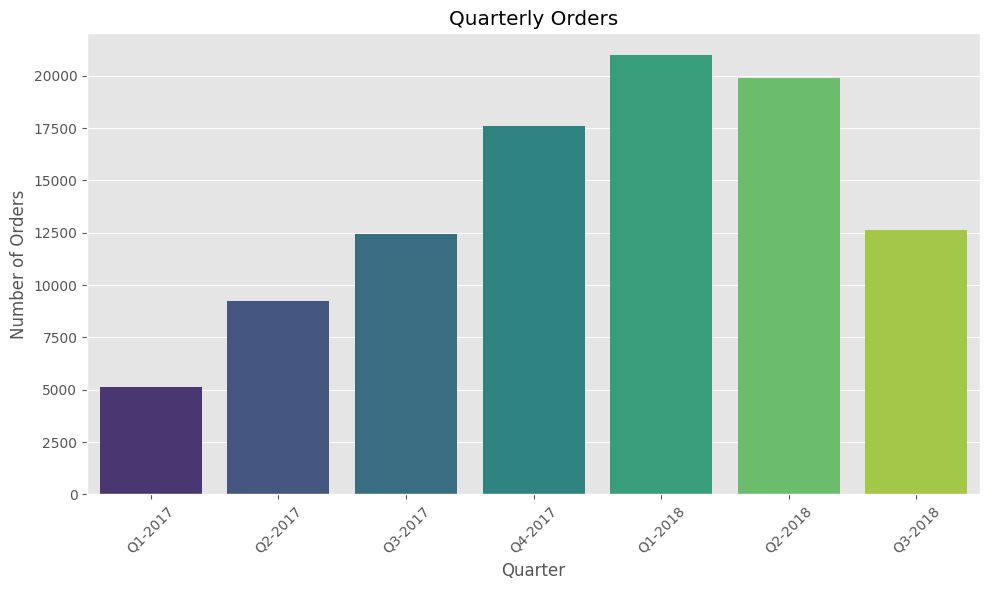

In [29]:
quarter_data = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='Q')).size()
formatted_dates = [f"Q{(date.month - 1) // 3 + 1}-{date.year}" for date in quarter_data.index]
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=formatted_dates, y=quarter_data.values, palette="viridis")

# Manually adjust width and gap
total_bars = len(quarter_data)
bar_width = 0.5  # Adjust the width of bars
gap_width = 0.5  # Adjust the gap between bars

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.title('Quarterly Orders')
# Manually set positions for xticks

plt.xticks([gap_width * i + bar_width * i for i in range(total_bars)], formatted_dates)
plt.tight_layout()
plt.show()

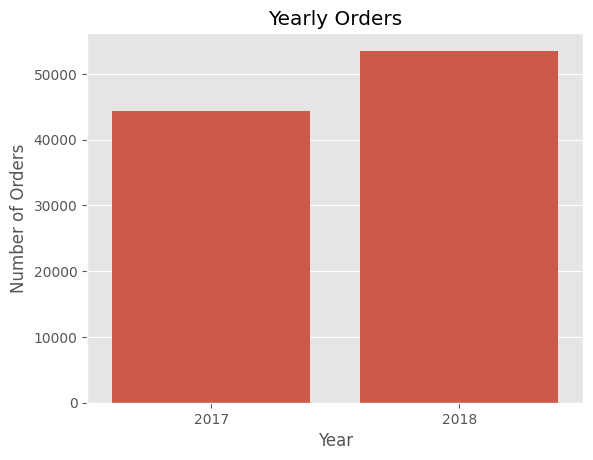

In [30]:
yearly_orders = olist_orders_dataset.groupby(pd.Grouper(key='order_purchase_timestamp', freq='Y')).size()
sns.barplot(x=yearly_orders.index.year,y=yearly_orders.values)
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Yearly Orders')
plt.show()

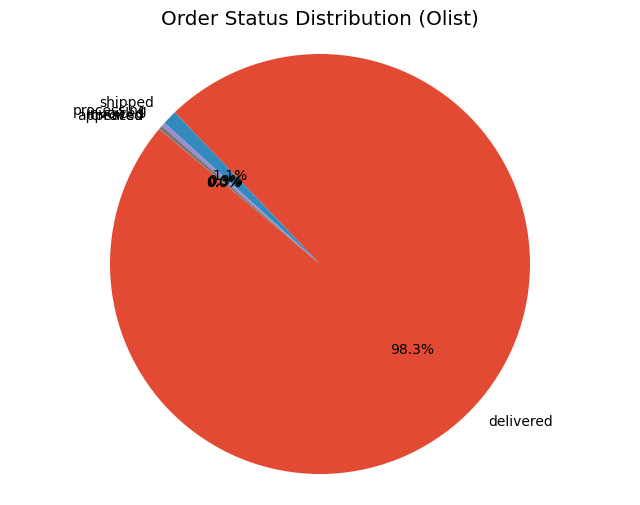

In [31]:
# sns.countplot( data=olist_orders_dataset , x = 'order_status' ,  )
# plt.yscale('log')
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your Olist orders dataset into a variable named 'olist_orders_dataset'

# Get the number of orders for each status
order_counts = olist_orders_dataset['order_status'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=140)  # Set start angle for a nicer donut shape

# Add a title and equal aspect ratio for a circular donut
plt.title("Order Status Distribution (Olist)")
plt.axis('equal')

plt.show()

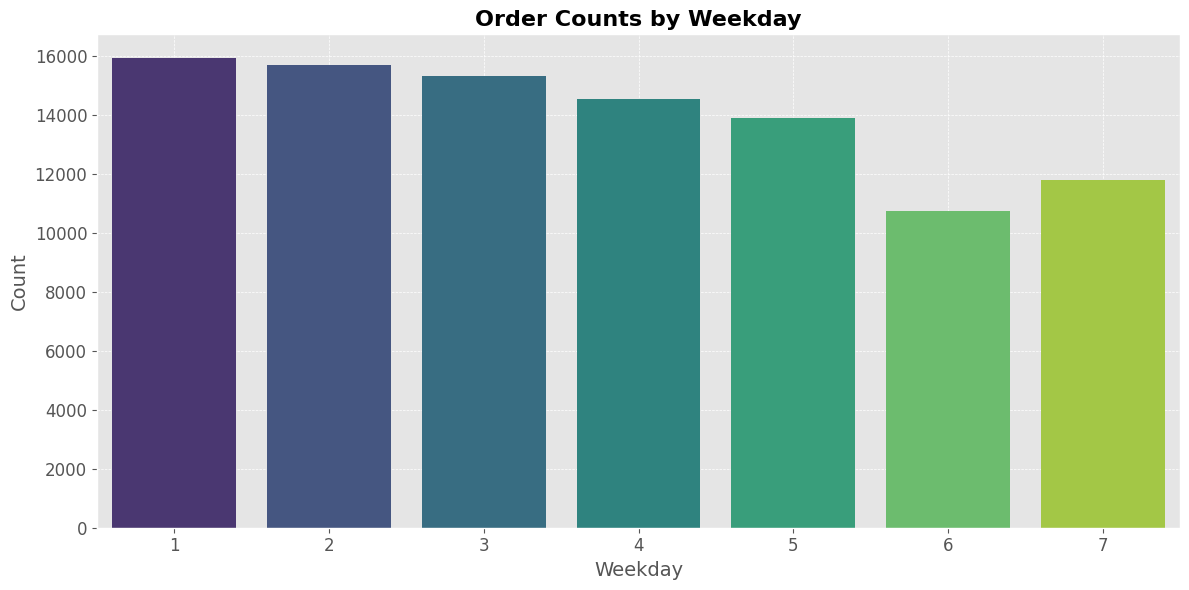

In [33]:
olist_orders_dataset['weekday']= olist_orders_dataset['order_purchase_timestamp'].dt.weekday + 1
weekday_counts = olist_orders_dataset['weekday'].value_counts().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_counts, x='weekday', y='count', palette='viridis')

# Set the title and labels
plt.title('Order Counts by Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the x-tick and y-tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Add a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

Weekdays have high sale. shocking

In [34]:
weekday_counts

weekday  count
0        1  15934
1        2  15702
2        3  15311
3        4  14524
4        5  13905
5        7  11808
6        6  10726

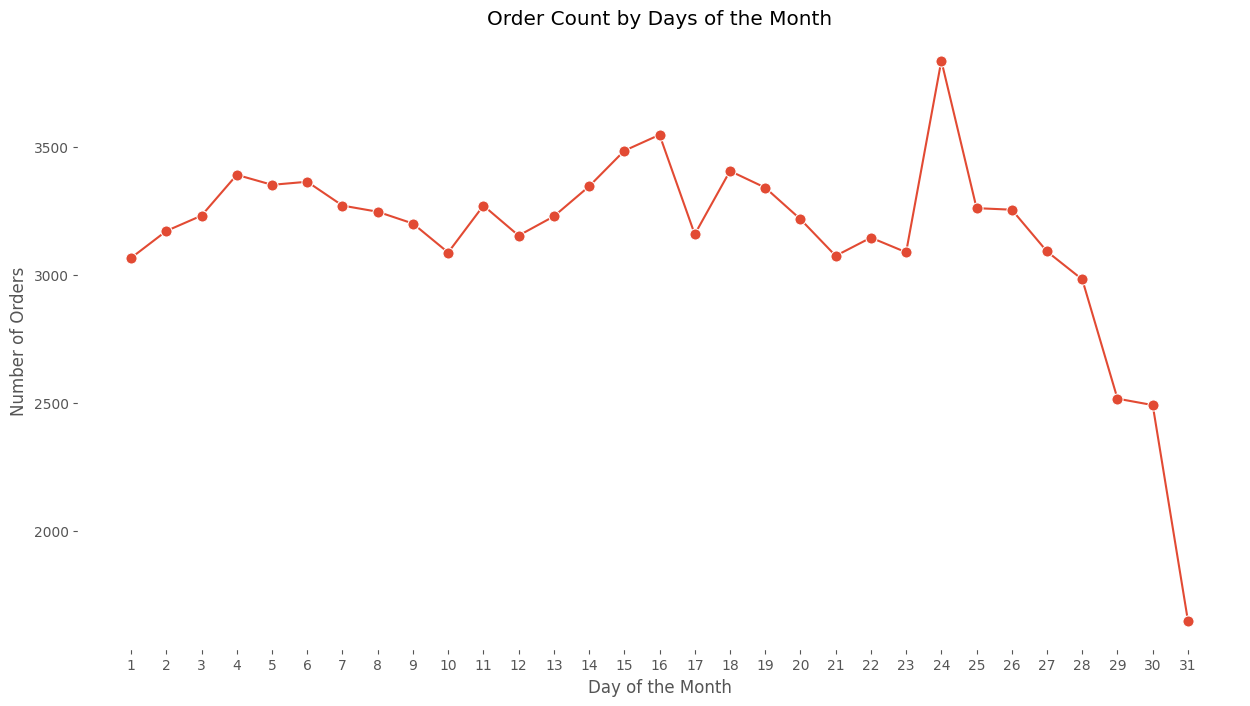

In [35]:
olist_orders_dataset['day'] = olist_orders_dataset['order_purchase_timestamp'].dt.day 
day_counts = olist_orders_dataset['day'].value_counts().reset_index()
day_counts.columns = ['day', 'count']
day_counts = day_counts.sort_values('day')

plt.figure(figsize=(15, 8))
sns.lineplot(x='day', y='count', data=day_counts, ci=None, marker='o', markersize=8) 
plt.title('Order Count by Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Orders')
plt.xticks(day_counts['day'])
plt.grid(False)
plt.gca().set_facecolor('white')  # Set the background color to white

# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.show()


### Delay in Delievery.

Dates like 3 to 5 , 15 to 17 and 24 to 26 have high sale.

In [37]:
olist_orders_dataset_new = olist_orders_dataset.dropna().copy()
olist_orders_dataset_new['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset_new['order_delivered_customer_date'])
olist_orders_dataset_new.loc[:,'time-elasped'] = olist_orders_dataset_new.loc[:,'order_delivered_customer_date'] - olist_orders_dataset_new.loc[:,'order_purchase_timestamp']
olist_orders_dataset_new.loc[:,'time-elasped-hours'] = olist_orders_dataset_new.loc[:,'time-elasped'].apply(lambda x : x.total_seconds()/3600 )
olist_orders_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96188 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   index                          96188 non-null  int64          
 1   order_id                       96188 non-null  object         
 2   customer_id                    96188 non-null  object         
 3   order_status                   96188 non-null  object         
 4   order_purchase_timestamp       96188 non-null  datetime64[ns] 
 5   order_approved_at              96188 non-null  object         
 6   order_delivered_carrier_date   96188 non-null  object         
 7   order_delivered_customer_date  96188 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  96188 non-null  object         
 9   weekday                        96188 non-null  int32          
 10  day                            96188 non-null  int32          
 11  time-el

In [38]:
order_time_statistics = olist_orders_dataset_new['time-elasped-hours'].describe()
q1 = order_time_statistics['25%']
q3 = order_time_statistics['75%']
IQR = q3-q1
right_outlier = IQR*1.5 + q3
print('right outlier  :',right_outlier)
order_time_statistics

right outlier  : 697.7361805555556


count    96188.000000
mean       300.910367
std        228.719124
min         12.801944
25%        162.148333
50%        245.021667
75%        376.383472
max       5031.086667
Name: time-elasped-hours, dtype: float64

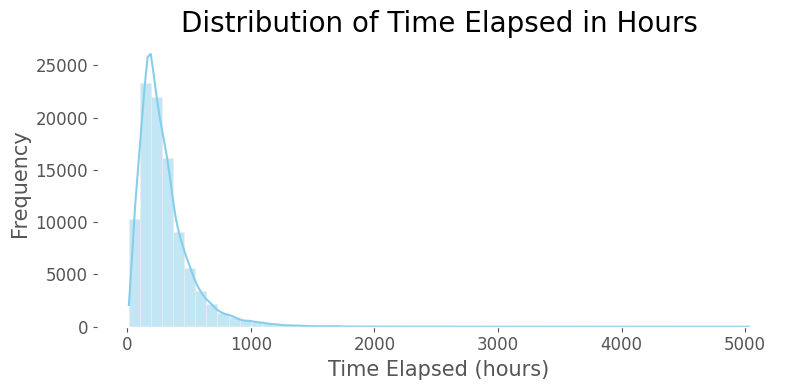

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(data=olist_orders_dataset_new, x='time-elasped-hours', binwidth=90, color='skyblue', kde=True)

# Customize the plot
plt.title('Distribution of Time Elapsed in Hours', fontsize=20)
plt.xlabel('Time Elapsed (hours)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
bins = (5031.086667 - 12.801944)/90
binwidth = 2*96203**(1/3)
binwidth

91.64164312367839

<Axes: xlabel='time-elasped-hours', ylabel='Density'>

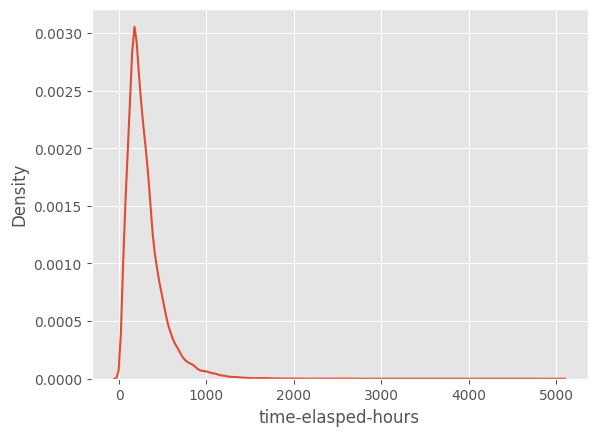

In [41]:
sns.kdeplot( data=olist_orders_dataset_new , x = 'time-elasped-hours' )

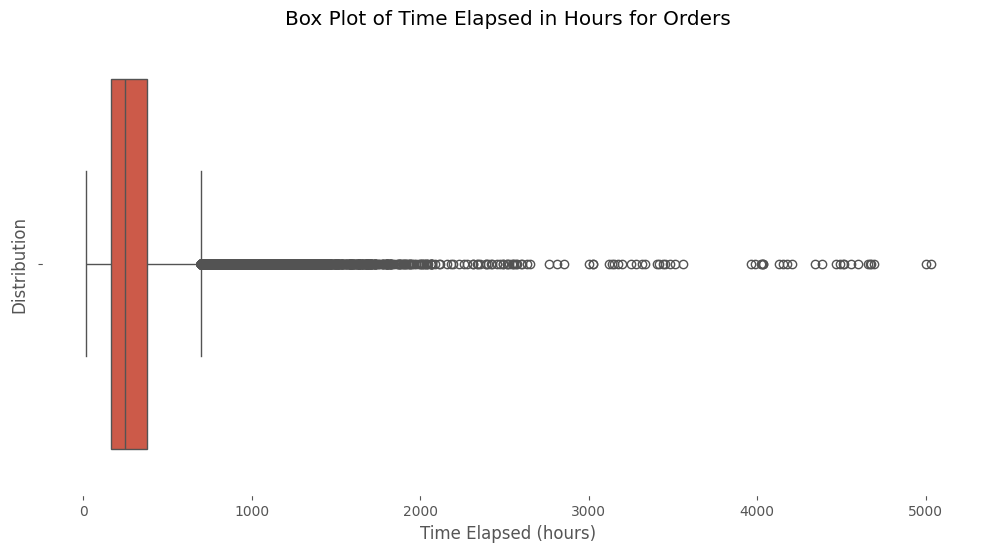

In [42]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='time-elasped-hours', data=olist_orders_dataset_new)
plt.title('Box Plot of Time Elapsed in Hours for Orders')
plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Distribution')

# Remove the background grid and set the background color to white
plt.grid(False)
plt.gca().set_facecolor('white')

# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.show()

**Right Skewed plot**

In [43]:
pd.cut(olist_orders_dataset_new['time-elasped-hours'] , bins=[0,250,500,750,1000,2000,3000,5000]).value_counts()

time-elasped-hours
(0, 250]        49319
(250, 500]      34150
(500, 750]       8775
(750, 1000]      2463
(1000, 2000]     1385
(2000, 3000]       54
(3000, 5000]       40
Name: count, dtype: int64

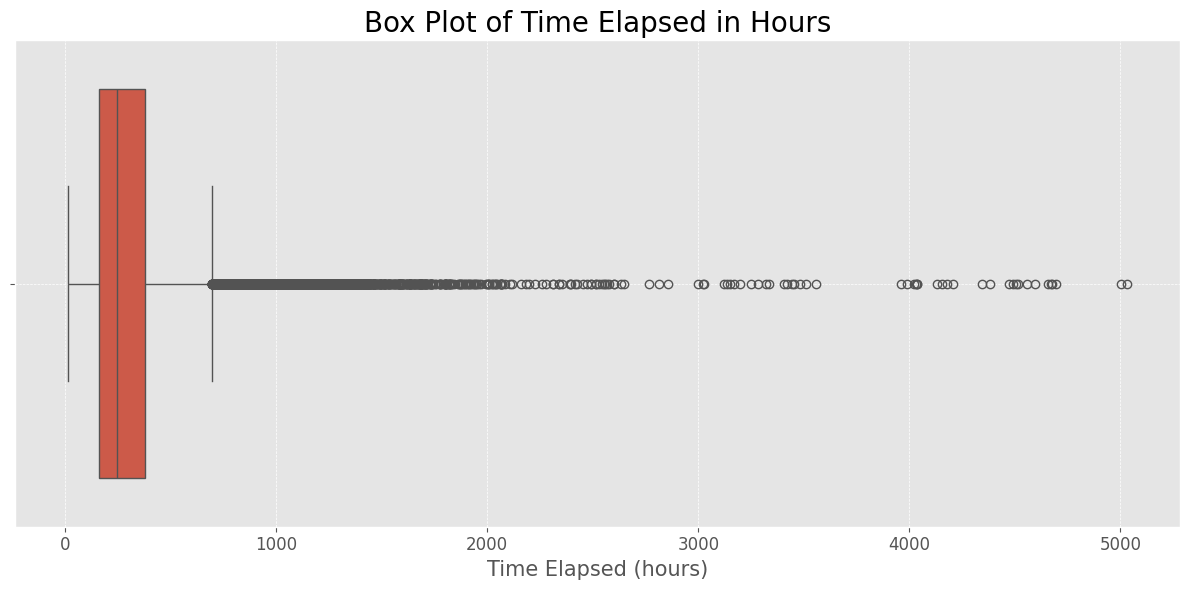

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=olist_orders_dataset_new['time-elasped-hours'] )

# Customize the plot
plt.title('Box Plot of Time Elapsed in Hours', fontsize=20)
plt.xlabel('Time Elapsed (hours)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
# plt.gca().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()

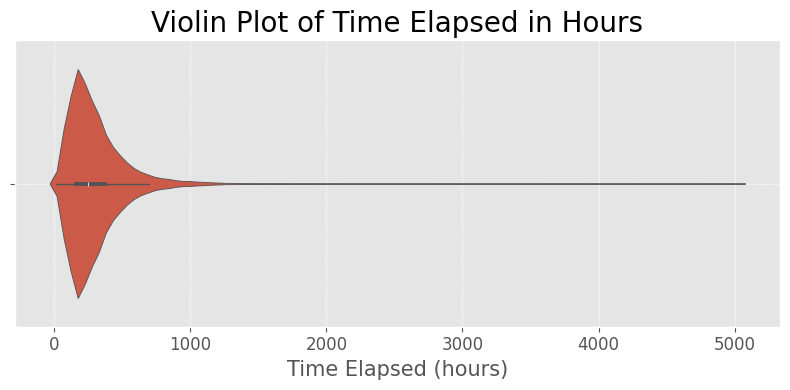

In [45]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=olist_orders_dataset_new['time-elasped-hours'], fill=True, inner="box")

# Customize the plot
plt.title('Violin Plot of Time Elapsed in Hours', fontsize=20)
plt.xlabel('Time Elapsed (hours)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
# plt.gca().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()

**Seems there are many outliers.**

In [46]:
outliers_in_time = (olist_orders_dataset_new['time-elasped-hours'] > right_outlier).sum()
print('outlier value', right_outlier)
print('outliers',outliers_in_time)

outlier value 697.7361805555556
outliers 4914


**olist_orders_dataset_new2 : olist_orders_dataset without outliers in time elaseped in delievery.**

In [47]:
olist_orders_dataset_new.head(2)

index                          order_id                       customer_id  \
0      0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  weekday  day     time-elasped  \
0           2017-10-18 00:00:00        1    2  8 days 10:28:40   
1           2018-08-13 00:00:00        2   24 13 days 18:46:08   

   time-elasped-hours  
0          202.477778  
1          330.768889

##### Seller data

olist_orders_dataset.head()

In [48]:
olist_sellers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
olist_sellers_dataset.head(2) # .................. 

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844  mogi guacu   

  seller_state  
0           SP  
1           SP

In [49]:
olist_order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [50]:
order_item_info = pd.merge(olist_orders_dataset,olist_order_items_dataset , on='order_id' , how='inner')
order_item_seller_data = pd.merge(order_item_info,olist_sellers_dataset , on='seller_id' , how='inner')

#### Na values

In [51]:
order_item_seller_data.isna().sum().reset_index()

index     0
0                           index     0
1                        order_id     0
2                     customer_id     0
3                    order_status     0
4        order_purchase_timestamp     0
5               order_approved_at    15
6    order_delivered_carrier_date   700
7   order_delivered_customer_date  1880
8   order_estimated_delivery_date     0
9                         weekday     0
10                            day     0
11                  order_item_id     0
12                     product_id     0
13                      seller_id     0
14            shipping_limit_date     0
15                          price     0
16                  freight_value     0
17         seller_zip_code_prefix     0
18                    seller_city     0
19                   seller_state     0

In [52]:
order_item_seller_data.dropna(inplace=True)
order_item_seller_data.isna().sum().reset_index()

index  0
0                           index  0
1                        order_id  0
2                     customer_id  0
3                    order_status  0
4        order_purchase_timestamp  0
5               order_approved_at  0
6    order_delivered_carrier_date  0
7   order_delivered_customer_date  0
8   order_estimated_delivery_date  0
9                         weekday  0
10                            day  0
11                  order_item_id  0
12                     product_id  0
13                      seller_id  0
14            shipping_limit_date  0
15                          price  0
16                  freight_value  0
17         seller_zip_code_prefix  0
18                    seller_city  0
19                   seller_state  0

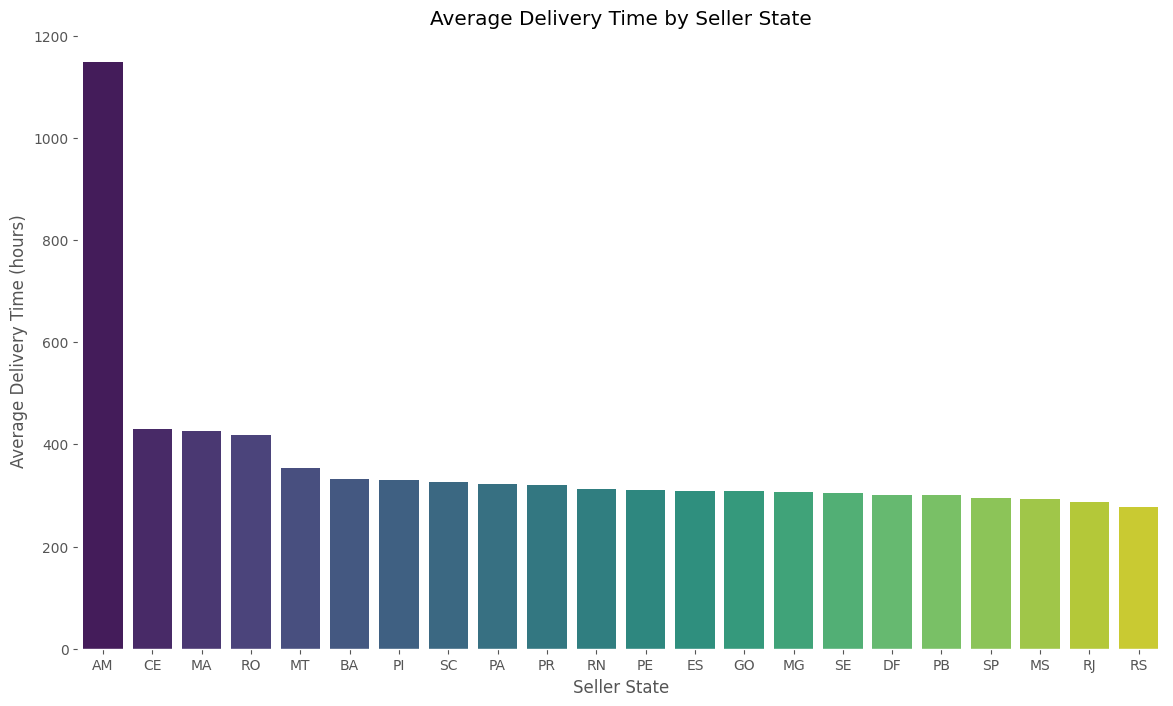

In [53]:
order_item_seller_data['order_purchase_timestamp'] = pd.to_datetime(order_item_seller_data['order_purchase_timestamp'])
order_item_seller_data['order_delivered_customer_date'] = pd.to_datetime(order_item_seller_data['order_delivered_customer_date'])
order_item_seller_data['order_estimated_delivery_date'] = pd.to_datetime(order_item_seller_data['order_estimated_delivery_date'])
order_item_seller_data['order_delivered_carrier_date'] = pd.to_datetime(order_item_seller_data['order_delivered_carrier_date'])  


order_item_seller_data['delievery_time'] =  order_item_seller_data['order_delivered_customer_date'] - order_item_seller_data['order_purchase_timestamp']
order_item_seller_data['delievery_time'] = order_item_seller_data['delievery_time'].dt.total_seconds()/3600


statewise_mean_delivery_time = order_item_seller_data.groupby('seller_state').agg({'delievery_time' : 'mean' })
statewise_mean_delivery_time = statewise_mean_delivery_time.reset_index().sort_values('delievery_time' , ascending=False)


plt.figure(figsize=(14, 8))
sns.barplot(x='seller_state', y='delievery_time', data=statewise_mean_delivery_time, palette='viridis')
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Delivery Time (hours)')

# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')

# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.show()

##### Category delievery Time.

In [54]:
order_item_info = pd.merge(olist_orders_dataset,olist_order_items_dataset , on='order_id' , how='inner')
order_item_seller_data = pd.merge(order_item_info,olist_sellers_dataset , on='seller_id' , how='inner')
#################################################################################################################################.........
product_data = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
category_delivery_data =  pd.merge(order_item_seller_data,product_data , on='product_id', how='inner')


In [55]:
category_delivery_data.isna().sum().reset_index()

index     0
0                           index     0
1                        order_id     0
2                     customer_id     0
3                    order_status     0
4        order_purchase_timestamp     0
5               order_approved_at    15
6    order_delivered_carrier_date   700
7   order_delivered_customer_date  1880
8   order_estimated_delivery_date     0
9                         weekday     0
10                            day     0
11                  order_item_id     0
12                     product_id     0
13                      seller_id     0
14            shipping_limit_date     0
15                          price     0
16                  freight_value     0
17         seller_zip_code_prefix     0
18                    seller_city     0
19                   seller_state     0
20          product_category_name  1587
21            product_name_lenght  1587
22     product_description_lenght  1587
23             product_photos_qty  1587
24               product_weight_g    18
25              product_length_cm    18
26              product_height_cm    18
27               product_width_cm    18

In [56]:
category_delivery_data.dropna(inplace=True)
category_delivery_data.isna().sum().reset_index()

index  0
0                           index  0
1                        order_id  0
2                     customer_id  0
3                    order_status  0
4        order_purchase_timestamp  0
5               order_approved_at  0
6    order_delivered_carrier_date  0
7   order_delivered_customer_date  0
8   order_estimated_delivery_date  0
9                         weekday  0
10                            day  0
11                  order_item_id  0
12                     product_id  0
13                      seller_id  0
14            shipping_limit_date  0
15                          price  0
16                  freight_value  0
17         seller_zip_code_prefix  0
18                    seller_city  0
19                   seller_state  0
20          product_category_name  0
21            product_name_lenght  0
22     product_description_lenght  0
23             product_photos_qty  0
24               product_weight_g  0
25              product_length_cm  0
26              product_height_cm  0
27               product_width_cm  0

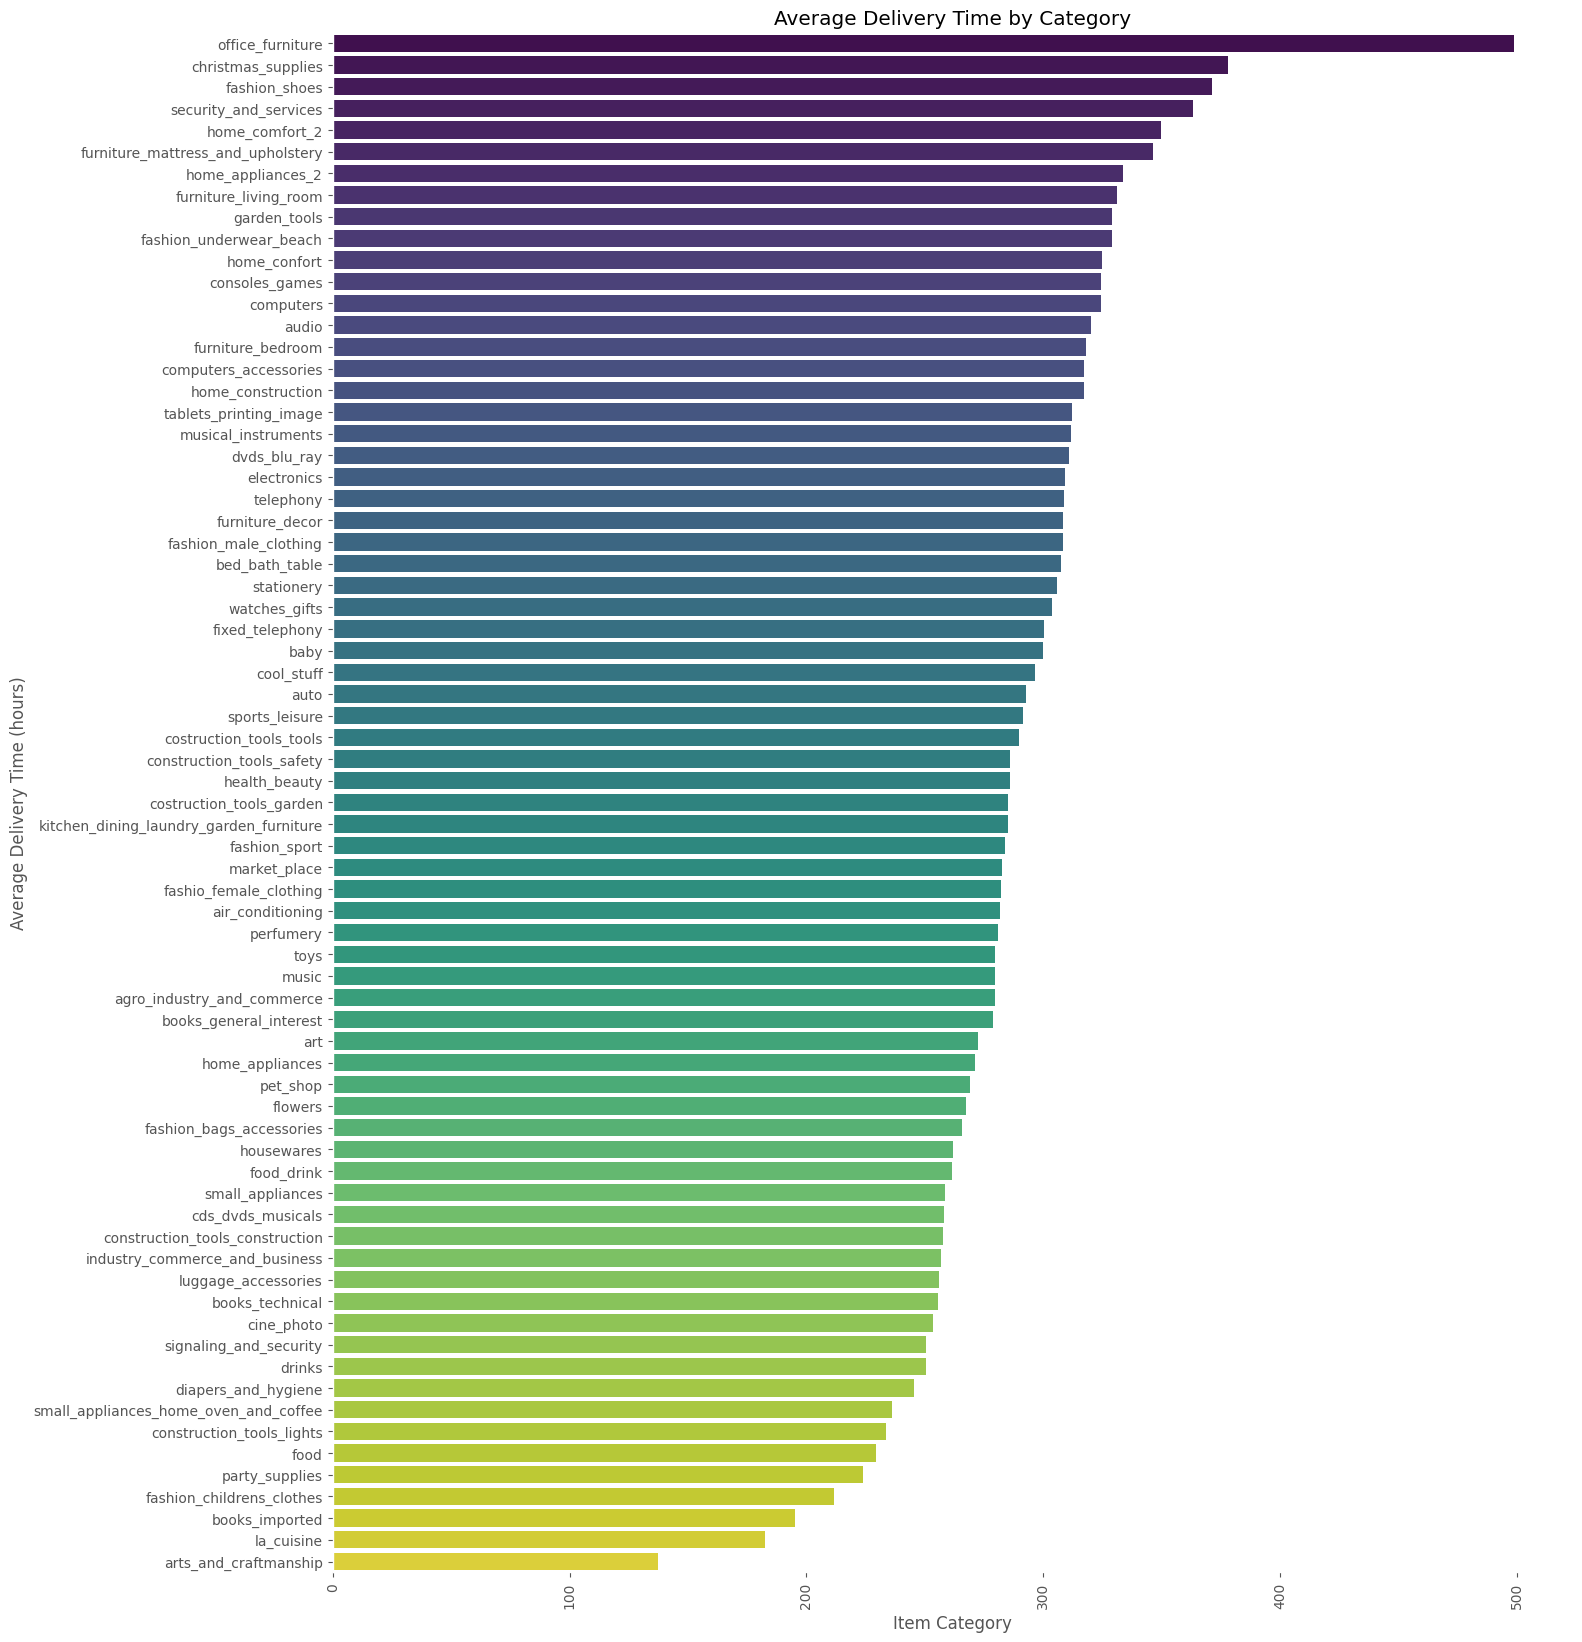

In [57]:

# Convert date columns to datetime
category_delivery_data['order_purchase_timestamp'] = pd.to_datetime(category_delivery_data['order_purchase_timestamp'])
category_delivery_data['order_delivered_customer_date'] = pd.to_datetime(category_delivery_data['order_delivered_customer_date'])
category_delivery_data['order_estimated_delivery_date'] = pd.to_datetime(category_delivery_data['order_estimated_delivery_date'])
category_delivery_data['order_delivered_carrier_date'] = pd.to_datetime(category_delivery_data['order_delivered_carrier_date'])

# Calculate volume
category_delivery_data['volume'] = (
    category_delivery_data['product_width_cm'] *
    category_delivery_data['product_height_cm'] *
    category_delivery_data['product_length_cm']
)

# Calculate delivery time in hours
category_delivery_data['delievery_time'] = (
    category_delivery_data['order_delivered_customer_date'] -
    category_delivery_data['order_purchase_timestamp']
)
category_delivery_data['delievery_time'] = category_delivery_data['delievery_time'].dt.total_seconds() / 3600

# Aggregate data by product category
category_delivery_data_agg = category_delivery_data.groupby('product_category_name').agg({
    'delievery_time': 'mean',
    'product_weight_g': 'mean',
    'volume': 'mean'
}).reset_index().sort_values('delievery_time', ascending=False)

#################################################################################################################################.........
category_translation = pd.read_csv('./kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
category_delivery_data_agg = pd.merge(category_delivery_data_agg,category_translation,on='product_category_name', )

# Plotting the bar plot
plt.figure(figsize=(16, 20))
sns.barplot(x='delievery_time', y='product_category_name_english', data=category_delivery_data_agg, palette='viridis')
plt.title('Average Delivery Time by Category')
plt.xlabel('Item Category')
plt.ylabel('Average Delivery Time (hours)')

# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')

# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


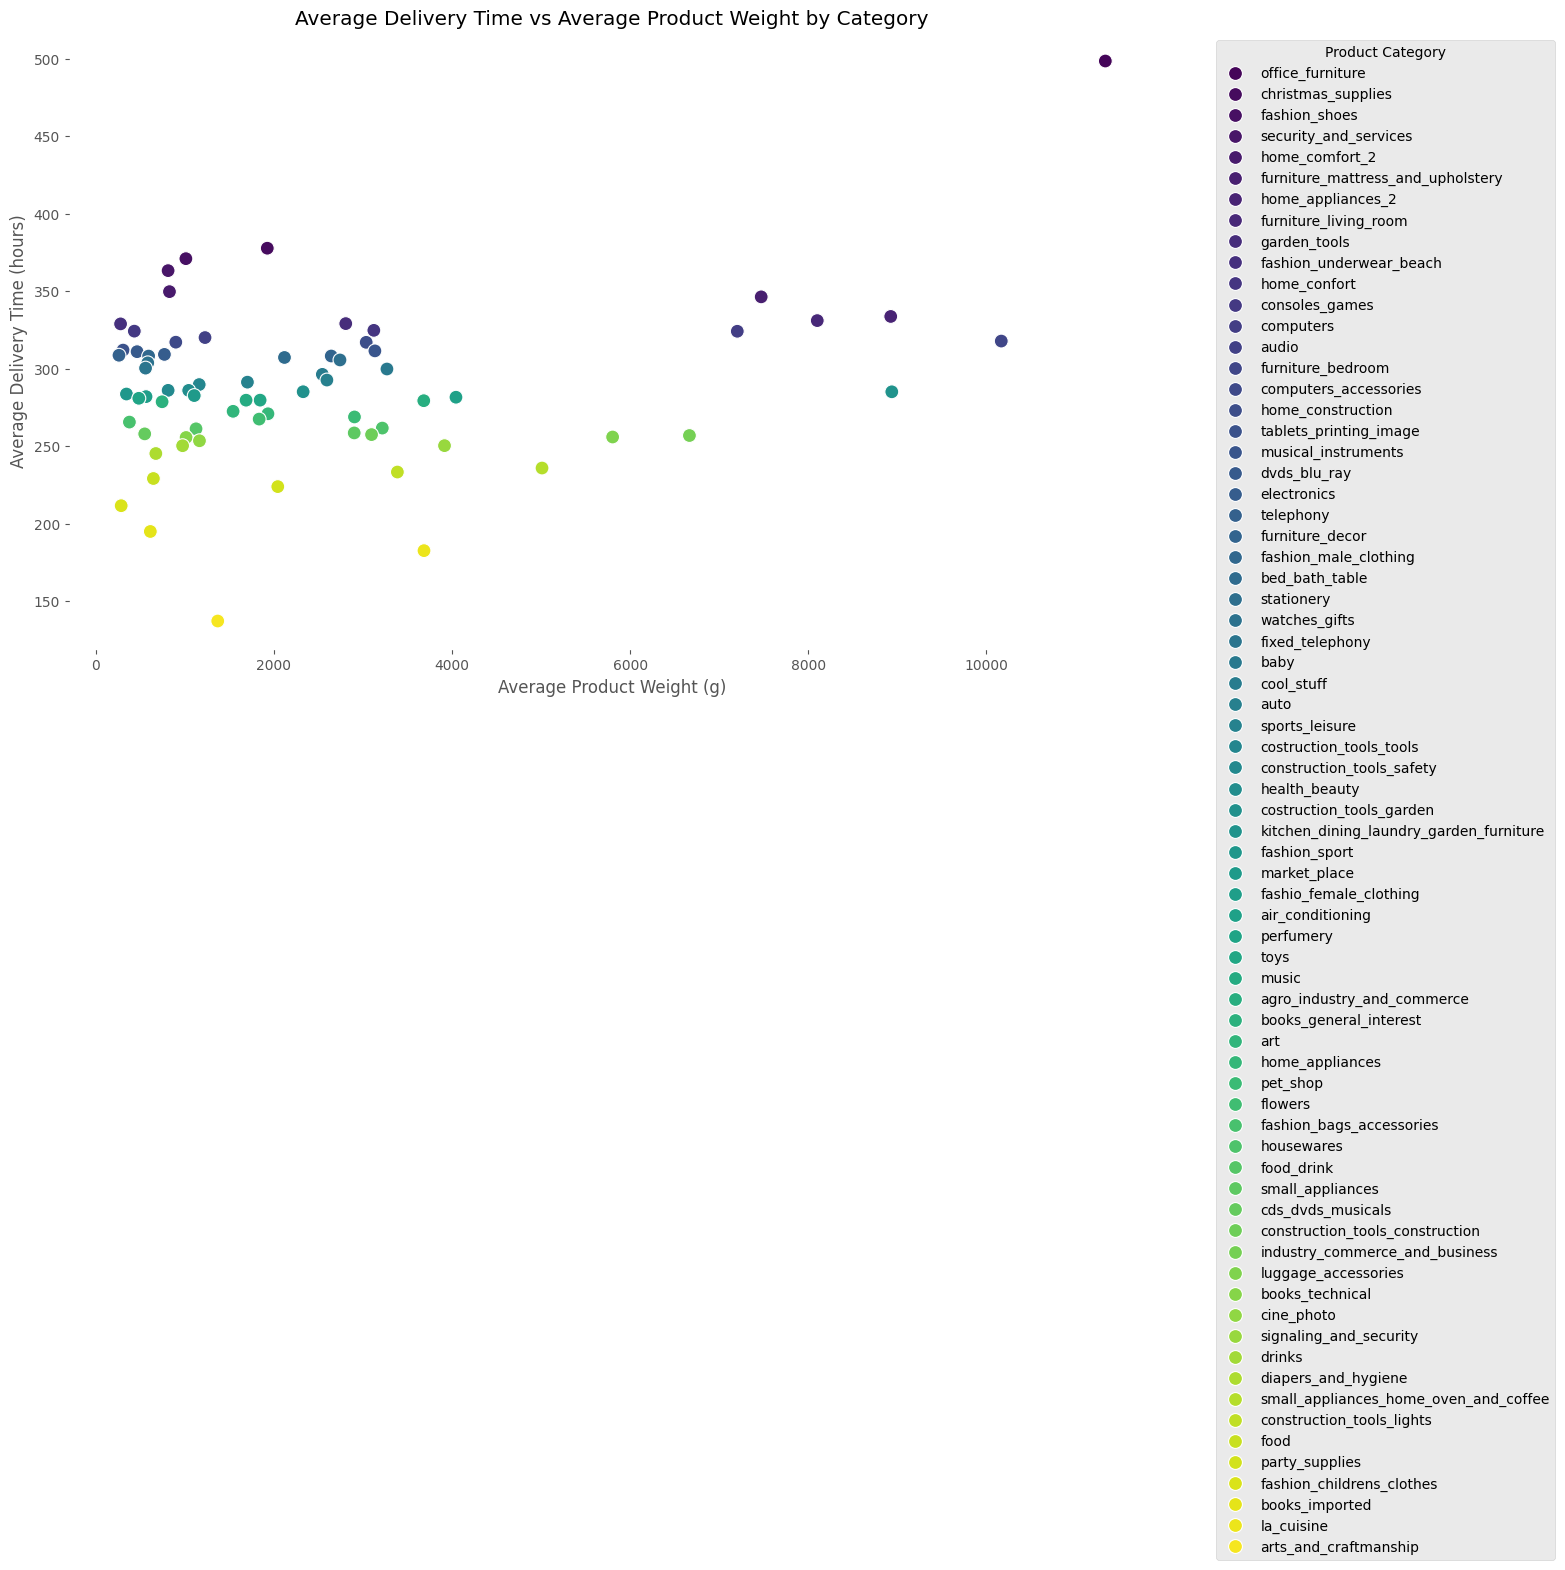

In [58]:
# Plotting the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='product_weight_g', y='delievery_time', data=category_delivery_data_agg, hue='product_category_name_english', palette='viridis', s=100)
plt.title('Average Delivery Time vs Average Product Weight by Category')
plt.xlabel('Average Product Weight (g)')
plt.ylabel('Average Delivery Time (hours)')


# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')


# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product Category')
# plt.tight_layout()

plt.show()


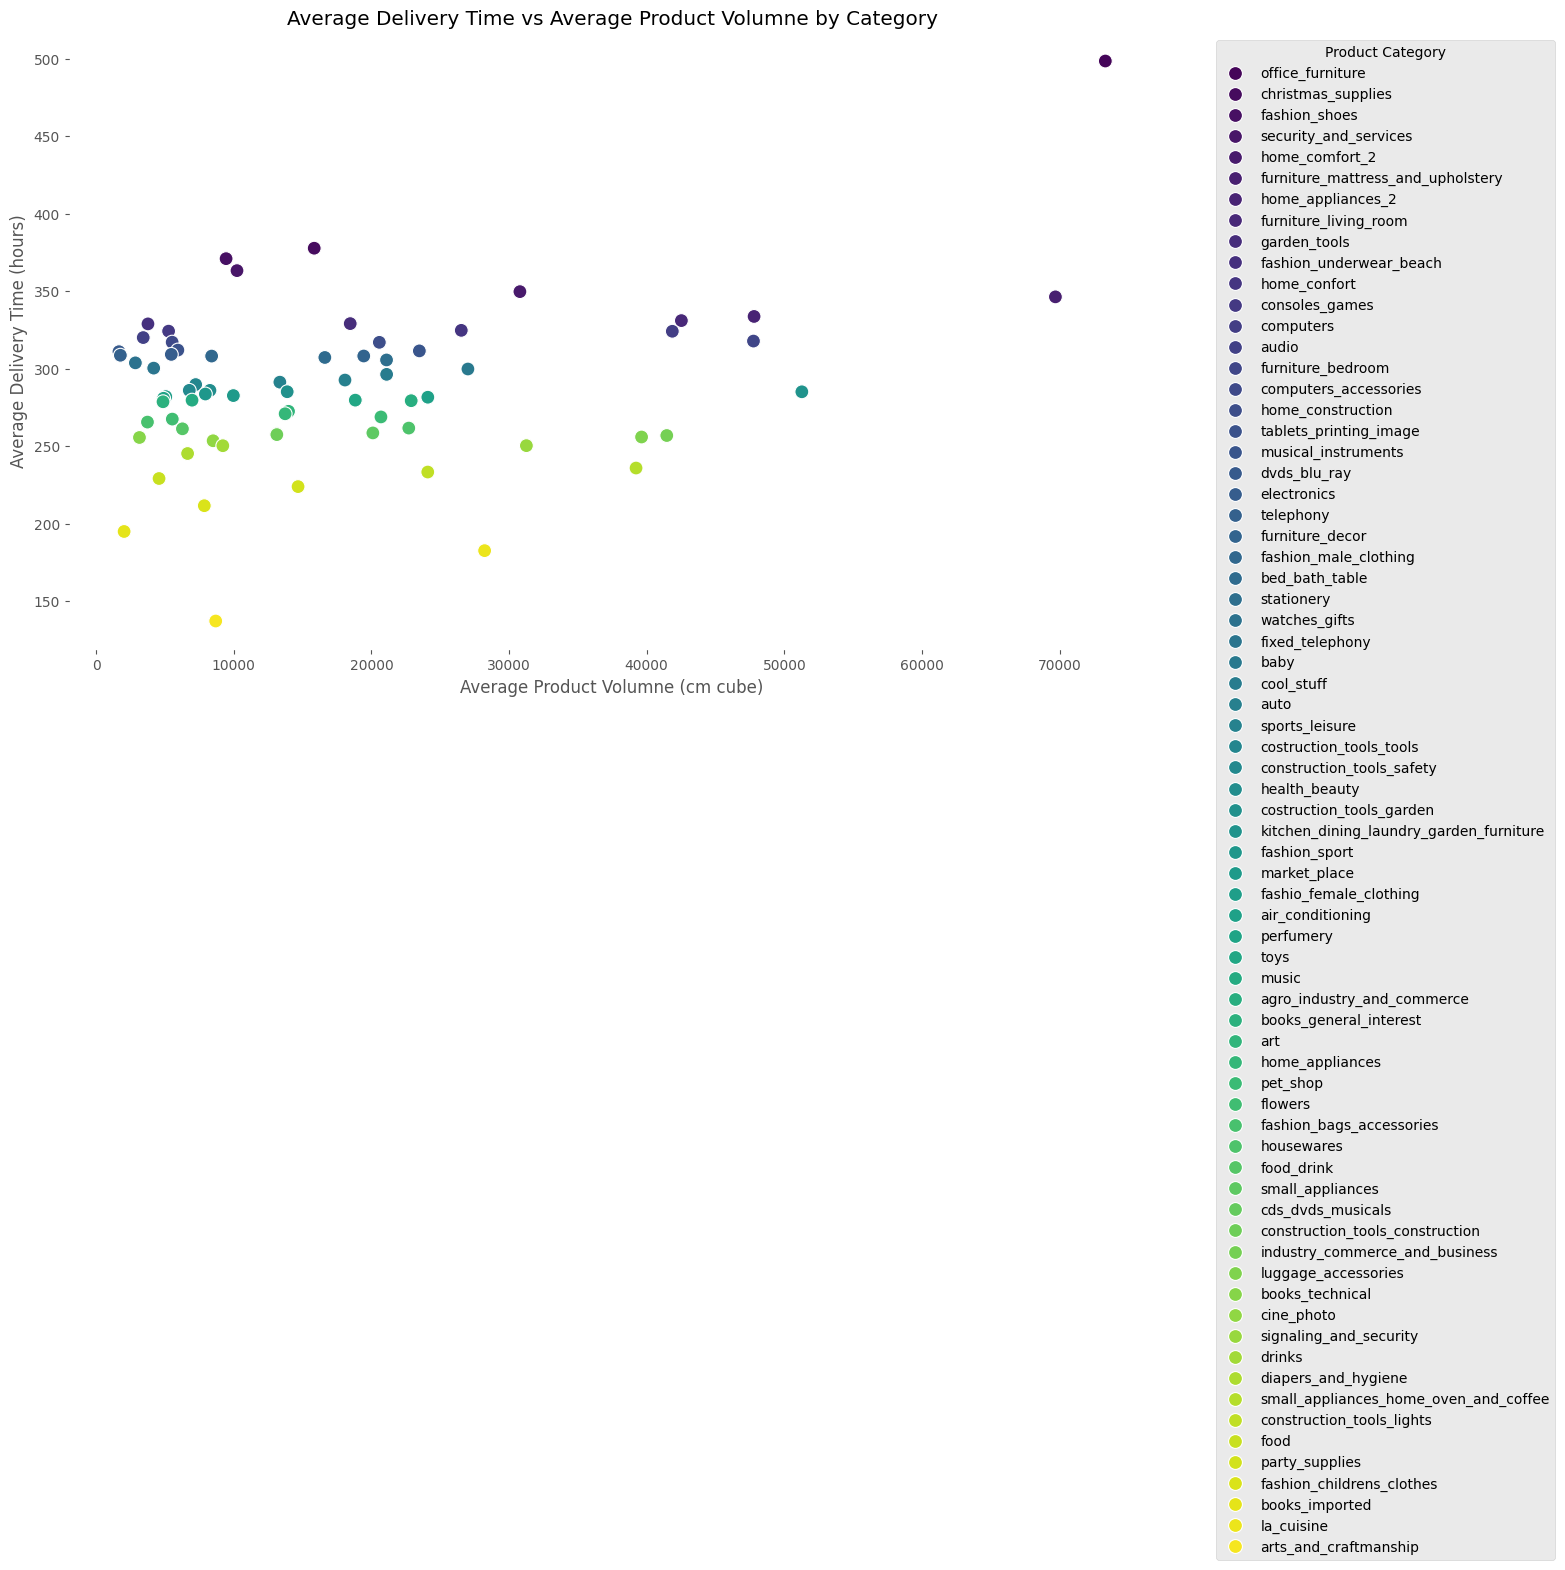

In [59]:
# Plotting the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='volume', y='delievery_time', data=category_delivery_data_agg, hue='product_category_name_english', palette='viridis', s=100)
plt.title('Average Delivery Time vs Average Product Volumne by Category')
plt.xlabel('Average Product Volumne (cm cube)')
plt.ylabel('Average Delivery Time (hours)')


# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')


# Ensure x and y axes are visible
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product Category')
# plt.tight_layout()

plt.show()


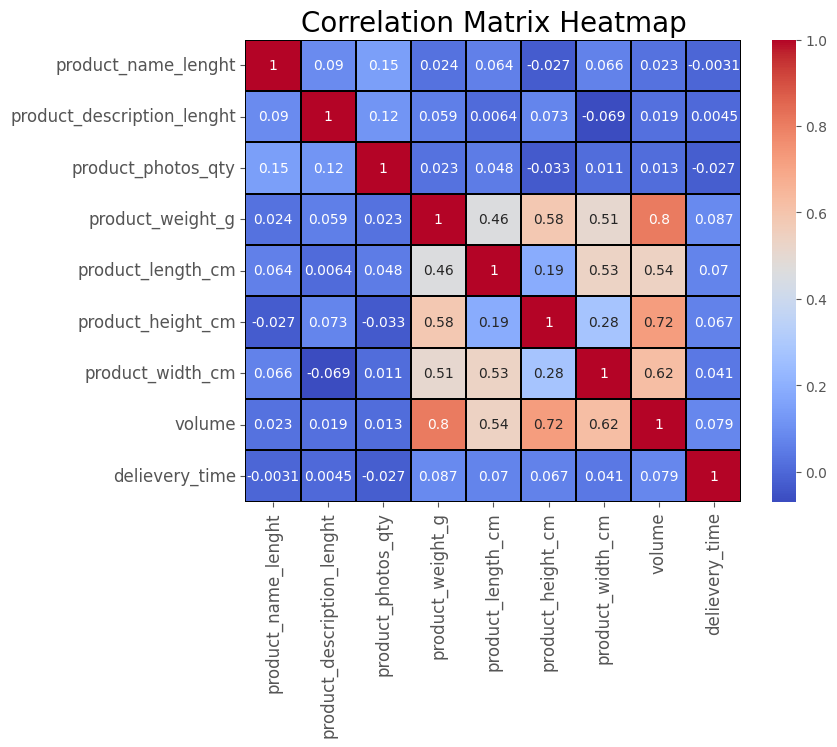

In [60]:
corr_matrix=category_delivery_data.iloc[:,-9:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2, linecolor='black')

# Customize the plot
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [61]:
category_delivery_data.columns

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'weekday', 'day', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'volume',
       'delievery_time'],
      dtype='object')

#### Distance between seller and customers

In [62]:
#####################################################################################################################3
olist_customers_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_geolocation_dataset = olist_geolocation_dataset.groupby('geolocation_zip_code_prefix').agg({"geolocation_lat":"mean",
                                                                                                 'geolocation_lng':'mean',
                                                                                                  })
olist_geolocation_dataset = olist_geolocation_dataset.reset_index()
olist_geolocation_dataset.head(2)


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.550190       -46.634024
1                         1002       -23.548146       -46.634979

In [63]:
# customer details in the distance data.
distance_data = pd.merge(category_delivery_data,olist_customers_dataset , on='customer_id',how='inner')

### seller location details
distance_data = pd.merge(distance_data,olist_geolocation_dataset.rename(columns={"geolocation_zip_code_prefix":"seller_zip_code_prefix" ,
                                                                         "geolocation_lat":"geolocation_lat_seller",
                                                                         "geolocation_lng":"geolocation_lng_seller"}) ,
                                                                            on="seller_zip_code_prefix" )


### seller location details
distance_data = pd.merge(distance_data,olist_geolocation_dataset.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix" ,
                                                                         "geolocation_lat":"geolocation_lat_customer",
                                                                         "geolocation_lng":"geolocation_lng_customer"}) ,
                                                                            on="customer_zip_code_prefix" )




def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


# Sample DataFrame (replace this with your actual DataFrame)
df = distance_data[['geolocation_lat_seller','geolocation_lng_seller','geolocation_lat_customer','geolocation_lng_customer']]

# Calculate the distance
distance_data['distance_km'] = df.apply(lambda row: haversine(row['geolocation_lat_seller'], 
                                                   row['geolocation_lng_seller'], 
                                                   row['geolocation_lat_customer'], 
                                                   row['geolocation_lng_customer']), axis=1)


distance_data.head(5)

index                          order_id                       customer_id  \
0      0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  weekday  ...  delievery_time  \
0                    2017-10-18        1  ...      202.477778   
1                    2018-08-13        2  ...      330.768889   
2                    2018-09-04        3  ...      225.461111   
3                    2017-12-15        6  ...      317.010000   
4                    2018-02-26        2  ...       68.973056   

                 customer_unique_id customer_zip_code_prefix  \
0  7c396fd4830fd04220f754e42b4e5bff                     3149   
1  af07308b275d755c9edb36a90c618231                    47813   
2  3a653a41f6f9fc3d2a113cf8398680e8                    75265   
3  7c142cf63193a1473d2e66489a9ae977                    59296   
4  72632f0f9dd73dfee390c9b22eb56dd6                     9195   

             customer_city customer_state  geolocation_lat_seller  \
0                sao paulo             SP              -23.680729   
1                barreiras             BA              -19.807681   
2               vianopolis             GO              -21.363502   
3  sao goncalo do amarante             RN              -19.837682   
4              santo andre             SP              -23.543395   

   geolocation_lng_seller  geolocation_lat_customer geolocation_lng_customer  \
0              -46.444238                -23.576983               -46.587161   
1              -43.980427                -12.177924               -44.660711   
2              -48.229601                -16.745150               -48.514783   
3              -43.924053                 -5.774190               -35.271143   
4              -46.262086                -23.676370               -46.514627   

   distance_km  
0    18.576110  
1   851.495069  
2   514.410666  
3  1822.226336  
4    29.676625  

[5 rows x 39 columns]

In [64]:
distance_data.isna().sum()

index                            0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
weekday                          0
day                              0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
volume              

In [65]:
len(distance_data), len(category_delivery_data) ,len(distance_data[['customer_unique_id']])

(107791, 108321, 107791)

In [66]:
category_delivery_data.columns

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'weekday', 'day', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'volume',
       'delievery_time'],
      dtype='object')

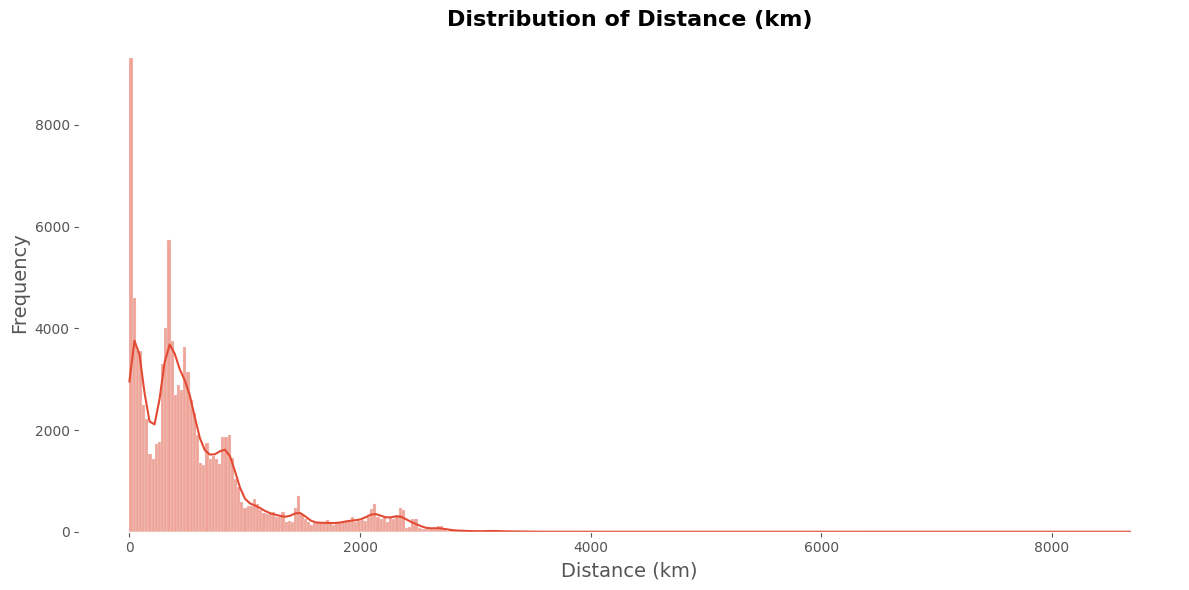

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(distance_data['distance_km'], bins=316, kde=True)
# Adding title and label
plt.title('Distribution of Distance (km)', fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.gca().set_facecolor('white')

# Add annotations or any other customizations if needed
plt.tight_layout()
plt.show()

NameError: name 'grouped_data' is not defined

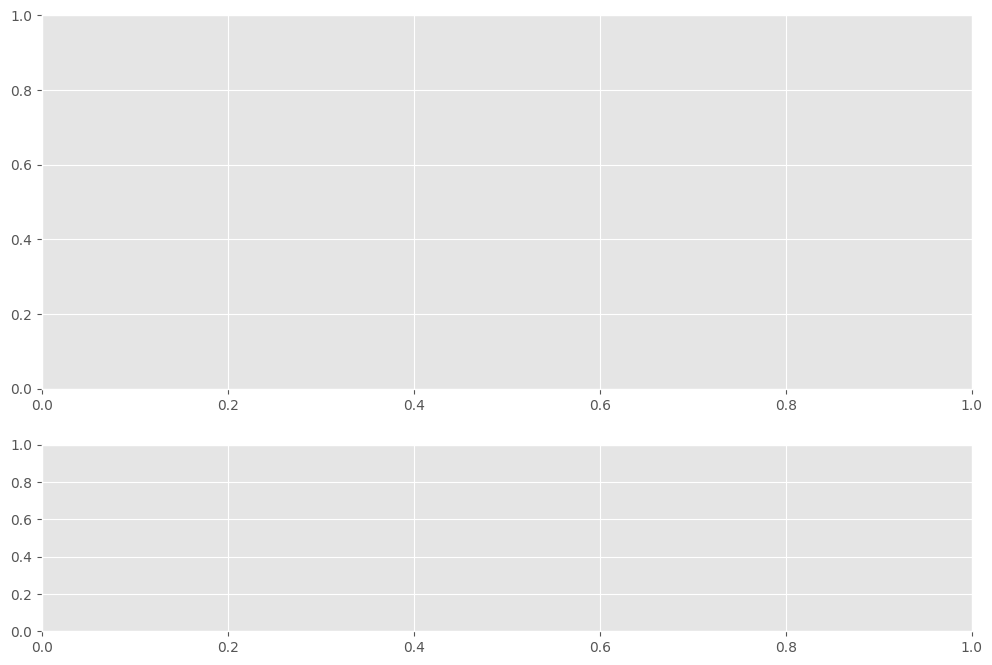

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [10, 5]})

# Plot the histogram with 316 bins
sns.histplot(grouped_data['distance_km'], bins=316, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Distance (km)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Distance (km)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7)
axes[0].set_facecolor('white')

# Plot the box plot
sns.boxplot(x=grouped_data['distance_km'], ax=axes[1])
axes[1].set_xlabel('Distance (km)', fontsize=14)
axes[1].set_facecolor('white')

# Customize the layout
plt.tight_layout()
plt.show()

In [69]:
# distance_data_grp = distance_data.groupby('order_id').agg({ 'delievery_time':'first'  , 'customer_city	':'first',  'customer_state':'first'} )
distance_data['order_id'].value_counts()
# distance_data.columns

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
09f7918cf38caeef665ddea1a74a6a5c     1
a2ae845d7d4ef0baf31d017fe7979483     1
71ae442d46d1764c665ba4c9e3073864     1
0d7409418627f0c642e73823145c505b     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: count, Length: 94388, dtype: int64

In [70]:
distance_data[distance_data['order_id'] ==  '8272b63d03f5f79c56e9e4120aec44ef']

import pandas as pd

# Assuming `distance_data` is your DataFrame
# Creating a dictionary to map columns to aggregation functions
agg_funcs = {
    'order_id': 'first',
    'customer_id': 'first',
    'order_status': 'first',
    'order_purchase_timestamp': 'min',
    'order_approved_at': 'min',
    'order_delivered_carrier_date': 'min',
    'order_delivered_customer_date': 'min',
    'order_estimated_delivery_date': 'min',
    'weekday': 'first',
    'day': 'first',
    'order_item_id': 'sum',
    'product_id': 'first',
    'seller_id': 'first',
    'shipping_limit_date': 'min',
    'price': 'sum',
    'freight_value': 'sum',
    'seller_zip_code_prefix': 'first',
    'seller_city': 'first',
    'seller_state': 'first',
    'volume': 'sum',
    'delievery_time': 'mean',
    'customer_unique_id': 'first',
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'geolocation_lat_seller': 'mean',
    'geolocation_lng_seller': 'mean',
    'geolocation_lat_customer': 'mean',
    'geolocation_lng_customer': 'mean',
    'distance_km': 'mean'
}

# Grouping by 'order_id' and applying the aggregation functions
grouped_data = distance_data.groupby('order_id').agg(agg_funcs)

grouped_data

order_id  \
order_id                                                             
00010242fe8c5a6d1ba2dd792cb16214  00010242fe8c5a6d1ba2dd792cb16214   
00018f77f2f0320c557190d7a144bdd3  00018f77f2f0320c557190d7a144bdd3   
000229ec398224ef6ca0657da4fc703e  000229ec398224ef6ca0657da4fc703e   
00024acbcdf0a6daa1e931b038114c75  00024acbcdf0a6daa1e931b038114c75   
00042b26cf59d7ce69dfabb4e55b4fd9  00042b26cf59d7ce69dfabb4e55b4fd9   
...                                                            ...   
fffc94f6ce00a00581880bf54a75a037  fffc94f6ce00a00581880bf54a75a037   
fffcd46ef2263f404302a634eb57f7eb  fffcd46ef2263f404302a634eb57f7eb   
fffce4705a9662cd70adb13d4a31832d  fffce4705a9662cd70adb13d4a31832d   
fffe18544ffabc95dfada21779c9644f  fffe18544ffabc95dfada21779c9644f   
fffe41c64501cc87c801fd61db3f6244  fffe41c64501cc87c801fd61db3f6244   

                                                       customer_id  \
order_id                                                             
00010242fe8c5a6d1ba2dd792cb16214  3ce436f183e68e07877b285a838db11a   
00018f77f2f0320c557190d7a144bdd3  f6dd3ec061db4e3987629fe6b26e5cce   
000229ec398224ef6ca0657da4fc703e  6489ae5e4333f3693df5ad4372dab6d3   
00024acbcdf0a6daa1e931b038114c75  d4eb9395c8c0431ee92fce09860c5a06   
00042b26cf59d7ce69dfabb4e55b4fd9  58dbd0b2d70206bf40e62cd34e84d795   
...                                                            ...   
fffc94f6ce00a00581880bf54a75a037  b51593916b4b8e0d6f66f2ae24f2673d   
fffcd46ef2263f404302a634eb57f7eb  84c5d4fbaf120aae381fad077416eaa0   
fffce4705a9662cd70adb13d4a31832d  29309aa813182aaddc9b259e31b870e6   
fffe18544ffabc95dfada21779c9644f  b5e6afd5a41800fdf401e0272ca74655   
fffe41c64501cc87c801fd61db3f6244  96d649da0cc4ff33bb408b199d4c7dcf   

                                 order_status order_purchase_timestamp  \
order_id                                                                 
00010242fe8c5a6d1ba2dd792cb16214    delivered      2017-09-13 08:59:02   
00018f77f2f0320c557190d7a144bdd3    delivered      2017-04-26 10:53:06   
000229ec398224ef6ca0657da4fc703e    delivered      2018-01-14 14:33:31   
00024acbcdf0a6daa1e931b038114c75    delivered      2018-08-08 10:00:35   
00042b26cf59d7ce69dfabb4e55b4fd9    delivered      2017-02-04 13:57:51   
...                                       ...                      ...   
fffc94f6ce00a00581880bf54a75a037    delivered      2018-04-23 13:57:06   
fffcd46ef2263f404302a634eb57f7eb    delivered      2018-07-14 10:26:46   
fffce4705a9662cd70adb13d4a31832d    delivered      2017-10-23 17:07:56   
fffe18544ffabc95dfada21779c9644f    delivered      2017-08-14 23:02:59   
fffe41c64501cc87c801fd61db3f6244    delivered      2018-06-09 17:00:18   

                                    order_approved_at  \
order_id                                                
00010242fe8c5a6d1ba2dd792cb16214  2017-09-13 09:45:35   
00018f77f2f0320c557190d7a144bdd3  2017-04-26 11:05:13   
000229ec398224ef6ca0657da4fc703e  2018-01-14 14:48:30   
00024acbcdf0a6daa1e931b038114c75  2018-08-08 10:10:18   
00042b26cf59d7ce69dfabb4e55b4fd9  2017-02-04 14:10:13   
...                                               ...   
fffc94f6ce00a00581880bf54a75a037  2018-04-25 04:11:01   
fffcd46ef2263f404302a634eb57f7eb  2018-07-17 04:31:48   
fffce4705a9662cd70adb13d4a31832d  2017-10-24 17:14:25   
fffe18544ffabc95dfada21779c9644f  2017-08-15 00:04:32   
fffe41c64501cc87c801fd61db3f6244  2018-06-09 17:10:13   

                                 order_delivered_carrier_date  \
order_id                                                        
00010242fe8c5a6d1ba2dd792cb16214          2017-09-19 18:34:16   
00018f77f2f0320c557190d7a144bdd3          2017-05-04 14:35:00   
000229ec398224ef6ca0657da4fc703e          2018-01-16 12:36:48   
00024acbcdf0a6daa1e931b038114c75          2018-08-10 13:28:00   
00042b26cf59d7ce69dfabb4e55b4fd9          2017-02-16 09:46:09   
...                                                       ...   
fffc94f6ce0

In [71]:
dist_statistics = grouped_data['distance_km'].describe()
q1 = dist_statistics['25%']
q3 = dist_statistics['75%']
IQR = q3-q1
right_outlier = IQR*1.5 + q3
print('right outlier  :',right_outlier)
grouped_data[grouped_data['distance_km'] > 1700 ]
# 1699.5960455441166 outliers
# 8263 orders
print('total orders' , len(grouped_data) , 'outliers are', 7425  , 'means' , 7425/len(grouped_data) )

right outlier  : 1711.8275228040804
total orders 94388 outliers are 7425 means 0.07866466076196127


In [72]:
distance_data.shape

(107791, 39)

In [73]:
distance_data.sort_values('distance_km').tail(10)

index                          order_id  \
41379   38176  2889d7816934298a0f5a4a30ef3ffbc7   
47310   43653  9b790ca446b8e28ce5e4382959f6b7df   
49225   45456  1b4f6e77a7bfc8aaecb66219bac6b9eb   
59384   54832  71fecd3061e596fd59e65e9d62886535   
93927   86781  89b158fc23656141a5e33e93954d025b   
56391   52068  4f1583d080fe1eec5e509335d79b17c6   
77780   71808  897ec6416d50126a9061626f0fc2d658   
6055     5634  acdbc7396e191931c263db11af241d62   
104941  96816  4d5abe7999d76d1fb6237d3677706af0   
803       728  8ad3f1d0f96992e43566c4c82c9f6c58   

                             customer_id order_status  \
41379   494fb0bd072cd8ccf901962d207864a8    delivered   
47310   ecc00bf7d2998377dad8e970fcf7beaf    delivered   
49225   fb5c13a43eab0c123ae49f226709b74a    delivered   
59384   7ad00854738c8fc46b6bf4c6974cfc49    delivered   
93927   93a8571aba21529cf631be8c49e279df    delivered   
56391   6203febf07756d9424976ade260a21d9    delivered   
77780   2dd769df72fbd8448297d18c48df7b92    delivered   
6055    816fa7cf00e01aaf19c7ad215b049c9b    delivered   
104941  88aac7b0942dcdb41ebabf7811b106fc    delivered   
803     948b29e24216a05fea13a18d8db45ea5    delivered   

       order_purchase_timestamp    order_approved_at  \
41379       2018-01-28 18:28:32  2018-01-28 18:50:15   
47310       2018-07-15 11:05:51  2018-07-15 11:24:11   
49225       2018-07-16 22:59:19  2018-07-17 21:35:15   
59384       2018-05-08 14:17:52  2018-05-08 14:30:18   
93927       2018-03-24 16:38:22  2018-03-24 16:50:28   
56391       2018-07-11 14:55:56  2018-07-11 15:06:23   
77780       2017-04-20 15:05:38  2017-04-20 15:21:31   
6055        2017-11-05 19:54:45  2017-11-07 07:30:48   
104941      2017-11-23 18:13:30  2017-11-23 18:55:39   
803         2018-07-17 21:25:29  2018-07-17 21:35:17   

       order_delivered_carrier_date order_delivered_customer_date  \
41379           2018-01-29 17:19:01           2018-02-22 18:39:03   
47310           2018-07-16 15:01:00           2018-08-17 01:38:26   
49225           2018-07-20 14:43:00           2018-08-07 16:26:38   
59384           2018-05-08 13:43:00           2018-05-22 19:08:28   
93927           2018-03-27 20:07:47           2018-04-18 00:56:57   
56391           2018-07-16 09:15:00           2018-08-02 00:28:50   
77780           2017-04-24 07:52:21           2017-05-18 08:06:47   
6055            2017-11-08 16:22:45           2017-12-04 21:04:22   
104941          2017-11-28 20:07:50           2017-12-19 08:58:58   
803             2018-07-18 13:08:00           2018-08-14 04:04:40   

       order_estimated_delivery_date  weekday  ...  delievery_time  \
41379                     2018-03-22        7  ...      600.175278   
47310                     2018-09-03        7  ...      782.543056   
49225                     2018-08-22        1  ...      521.455278   
59384                     2018-06-12        2  ...      340.843333   
93927                     2018-05-15        6  ...      584.309722   
56391                     2018-07-31        3  ...      513.548333   
77780                     2017-05-22        4  ...      665.019167   
6055                      2017-12-14        7  ...      697.160278   
104941                    2018-01-04        4  ...      614.757778   
803                       2018-08-03        2  ...      654.653056   

                      customer_unique_id customer_zip_code_prefix  \
41379   2d006f3f447dba0133fac880d10c8978                    69303   
47310   4f33194ab5bc0ff58322acc740c36798                    69317   
49225   c037aa753c0787f6e28b2d5c5e40d997                    68447   
59384   0b0c6c4b2a8dd9793de2a049cf67684e                    68447   
93927   f570b38fd1007c094f293aadb09bcedf                    68447   
56391   dcd0109674ca3d5598fb352bccc02c3c                    29654   
77780   6e9d7c002cb4603011d3e83033b01878                    46560   
6055    9e68775971541ca8a79b6fce848e7aee                    68275   
104941  2a4b1192846ec238d62df3838257bad9         

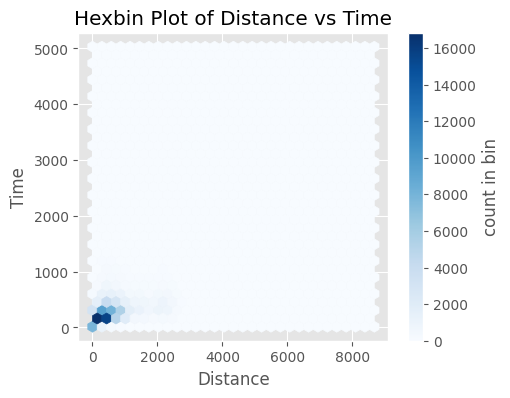

In [74]:
plt.figure( figsize=(5, 4) )
plt.hexbin(data =distance_data , y= 'delievery_time' , x='distance_km', gridsize=30, cmap='Blues' )
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot of Distance vs Time')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

C:\Users\HHH\AppData\Local\Temp\ipykernel_4064\2214675518.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=grouped_data, y='delievery_time', x='distance_km', s=50, alpha=0.7, edgecolor='w', palette='viridis')


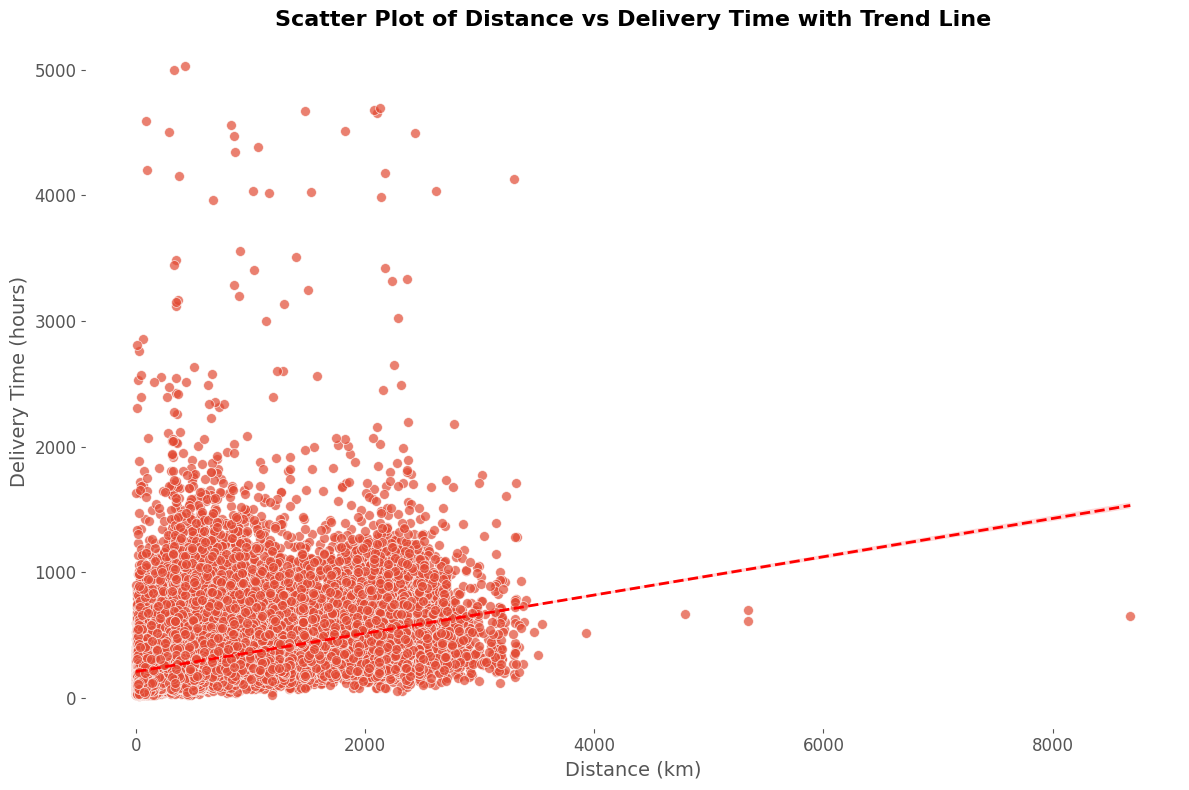

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=grouped_data, y='delievery_time', x='distance_km', s=50, alpha=0.7, edgecolor='w', palette='viridis')

# Trend line
sns.regplot(data=grouped_data, y='delievery_time', x='distance_km', scatter=False, color='red', line_kws={"linewidth": 2, "linestyle": "--"})

# Customizing the plot
plt.title('Scatter Plot of Distance vs Delivery Time with Trend Line', fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Delivery Time (hours)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\HHH\AppData\Local\Temp\ipykernel_4064\2283950718.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=filtered_data, y='delievery_time', x='distance_km', s=20, alpha=0.4, edgecolor='b', palette='viridis')


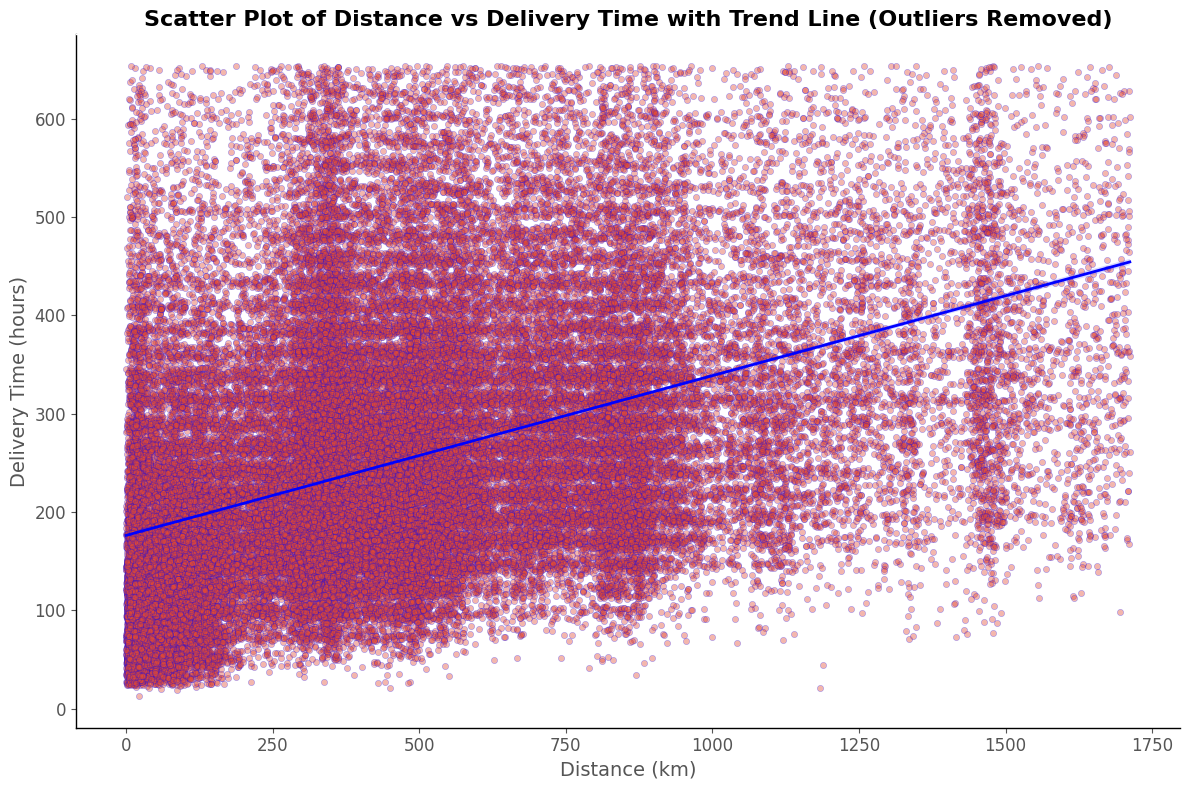

In [76]:
 # Remove outliers for both distance_km and delievery_time

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
filtered_data = remove_outliers(grouped_data, 'distance_km')
filtered_data = remove_outliers(filtered_data, 'delievery_time')

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=filtered_data, y='delievery_time', x='distance_km', s=20, alpha=0.4, edgecolor='b', palette='viridis')

# Trend line
sns.regplot(data=filtered_data, y='delievery_time', x='distance_km', scatter=False, color='blue', line_kws={"linewidth": 2, "linestyle": "-"})

# Customizing the plot
plt.title('Scatter Plot of Distance vs Delivery Time with Trend Line (Outliers Removed)', fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Delivery Time (hours)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.tight_layout()

# Display the plot
plt.show()

In [77]:
correlation_matrix = filtered_data[['distance_km', 'delievery_time']].corr()

print(correlation_matrix)

                distance_km  delievery_time
distance_km         1.00000         0.44039
delievery_time      0.44039         1.00000


In [78]:
corr_data = distance_data[['price', 'freight_value','delievery_time', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'volume',
       'delievery_time', 'distance_km']]

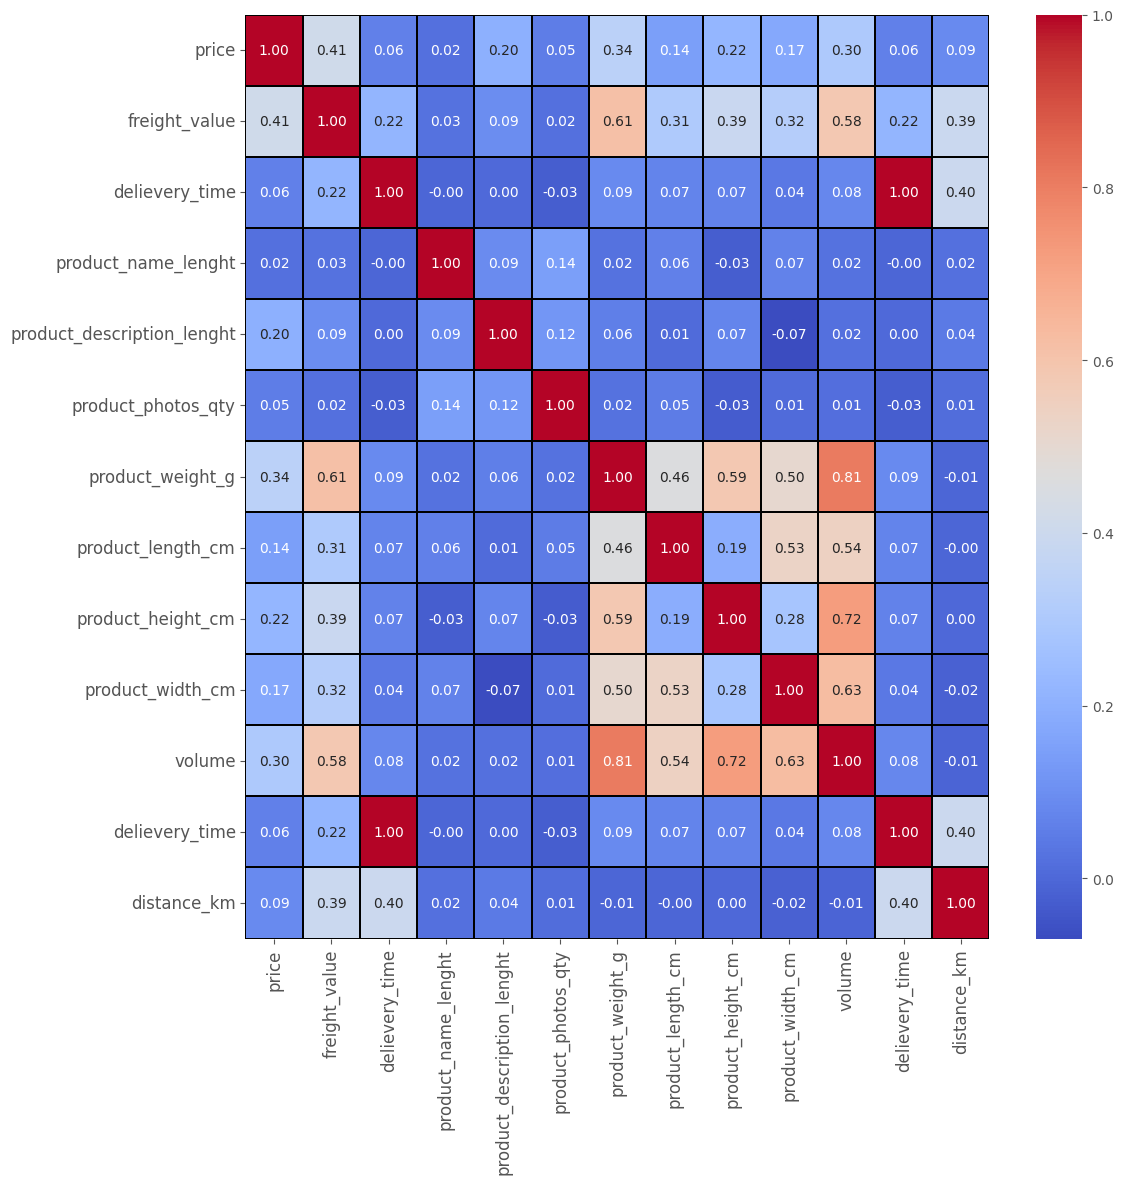

In [79]:
corr_matrix=corr_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2, linecolor='black' ,  fmt=".2f")

# Customize the plot
# plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [80]:
try : 
    distance_data.drop('index' , axis=1 , inplace=True)
except Exception as e:
    print(e)

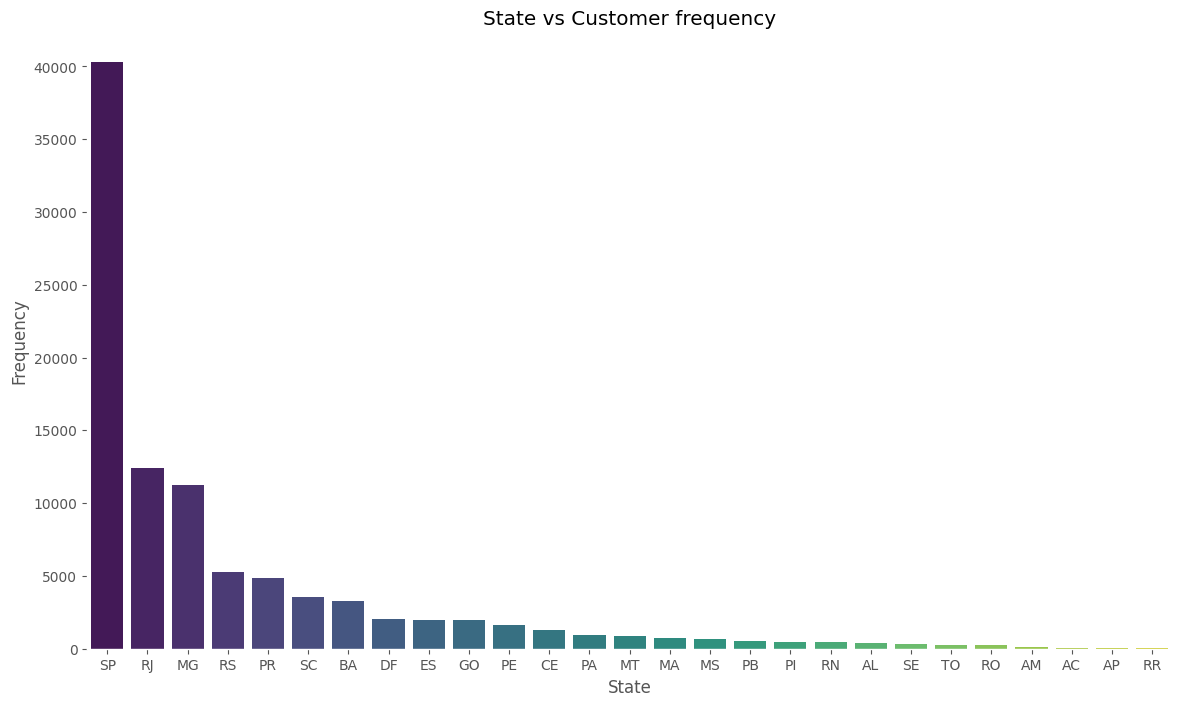

In [81]:
state_and_customers=olist_customers_dataset.groupby('customer_state').agg({'customer_unique_id':'nunique'}).sort_values('customer_unique_id' , ascending=False)


plt.figure(figsize=(14, 8))
sns.barplot(data=state_and_customers , x='customer_state', y='customer_unique_id', palette='viridis')
plt.title('State vs Customer frequency')
plt.xlabel('State')
plt.ylabel('Frequency')


# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')

# # Ensure x and y axes are visible
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(True)
# plt.gca().spines['bottom'].set_visible(True)

plt.show()

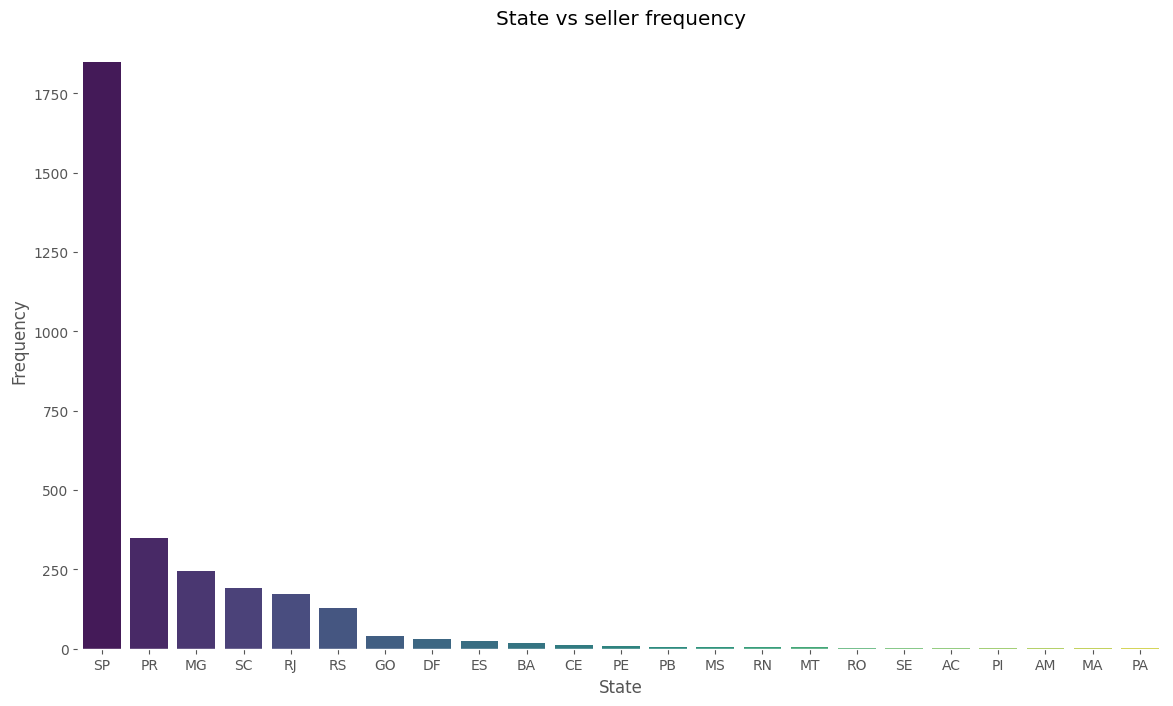

In [82]:
state_and_sellers=olist_sellers_dataset.groupby('seller_state').agg({'seller_id':'count'}).sort_values('seller_id' , ascending=False)
state_and_sellers


plt.figure(figsize=(14, 8))
sns.barplot(data=state_and_sellers , x='seller_state', y='seller_id', palette='viridis')
plt.title('State vs seller frequency')
plt.xlabel('State')
plt.ylabel('Frequency')


# Remove background grid and set background color to white
plt.grid(False)
plt.gca().set_facecolor('white')


# # Ensure x and y axes are visible
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(True)
# plt.gca().spines['bottom'].set_visible(True)

plt.show()

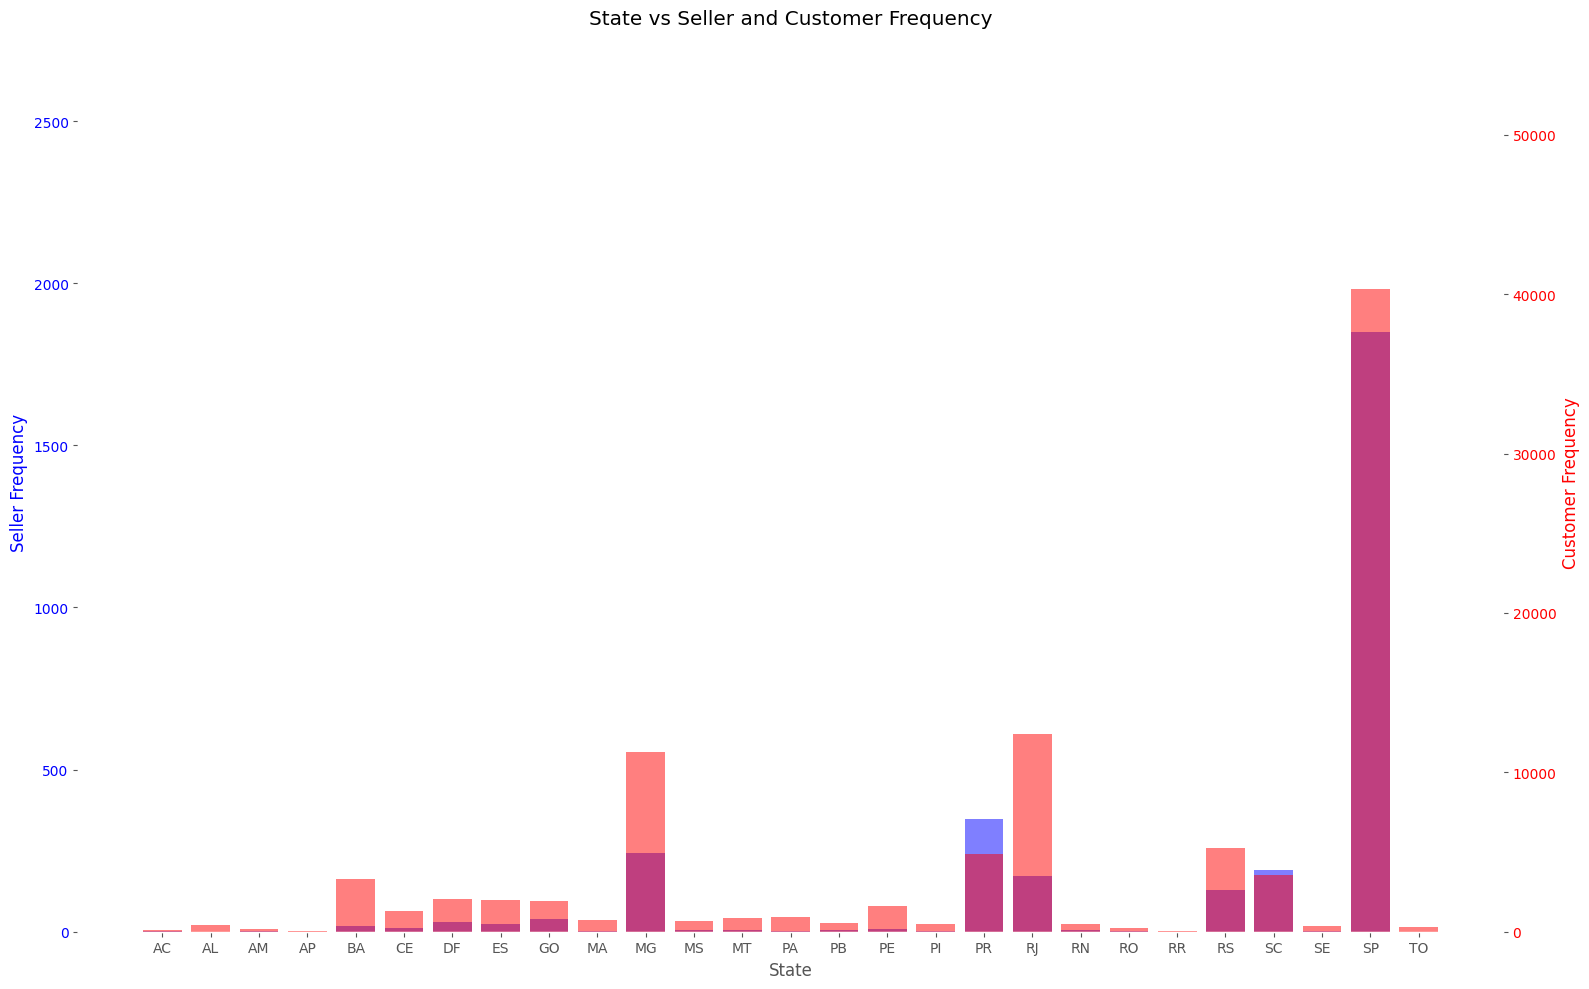

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group and aggregate the data
state_and_sellers = olist_sellers_dataset.groupby('seller_state').agg({'seller_id': 'count'}).sort_values('seller_id', ascending=False)
state_and_customers = olist_customers_dataset.groupby('customer_state').agg({'customer_unique_id': 'nunique'}).sort_values('customer_unique_id', ascending=False)

# Rename columns for merging
state_and_sellers.columns = ['seller_frequency']
state_and_customers.columns = ['customer_frequency']

# Merge the datasets
merged_data = pd.merge(state_and_sellers, state_and_customers, left_index=True, right_index=True, how='outer').fillna(0)

# Reset the index for plotting
merged_data = merged_data.reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot seller frequency
ax1.bar(merged_data['index'], merged_data['seller_frequency'], color='b', alpha=0.5, label='Sellers')
ax1.set_xlabel('State')
ax1.set_ylabel('Seller Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# Plot customer frequency on the second y-axis
ax2 = ax1.twinx()
ax2.bar(merged_data['index'], merged_data['customer_frequency'], color='r', alpha=0.5, label='Customers')
ax2.set_ylabel('Customer Frequency', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_ylim(0, merged_data['seller_frequency'].max() * 1.5 )
ax2.set_ylim(0, merged_data['customer_frequency'].max() * 1.4 )
# Add title and legend
plt.title('State vs Seller and Customer Frequency')
fig.tight_layout()

# Rotate x-axis labels
plt.xticks(rotation=45)

# Remove background grid and set background color to white
ax1.grid(False)
ax1.set_facecolor('white')
ax2.grid(False)

plt.show()


In [84]:
dist_data = distance_data.groupby('seller_state').agg({'delievery_time': 'mean' ,  'distance_km':'mean' , 'freight_value':'mean'  }).reset_index()

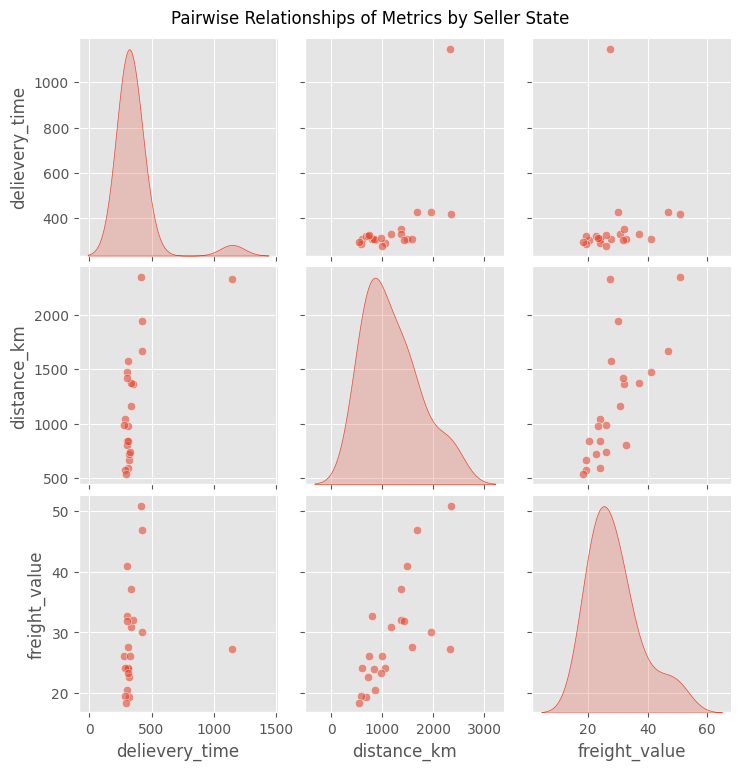

In [85]:
sns.pairplot(dist_data, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Relationships of Metrics by Seller State', y=1.02)
plt.show()

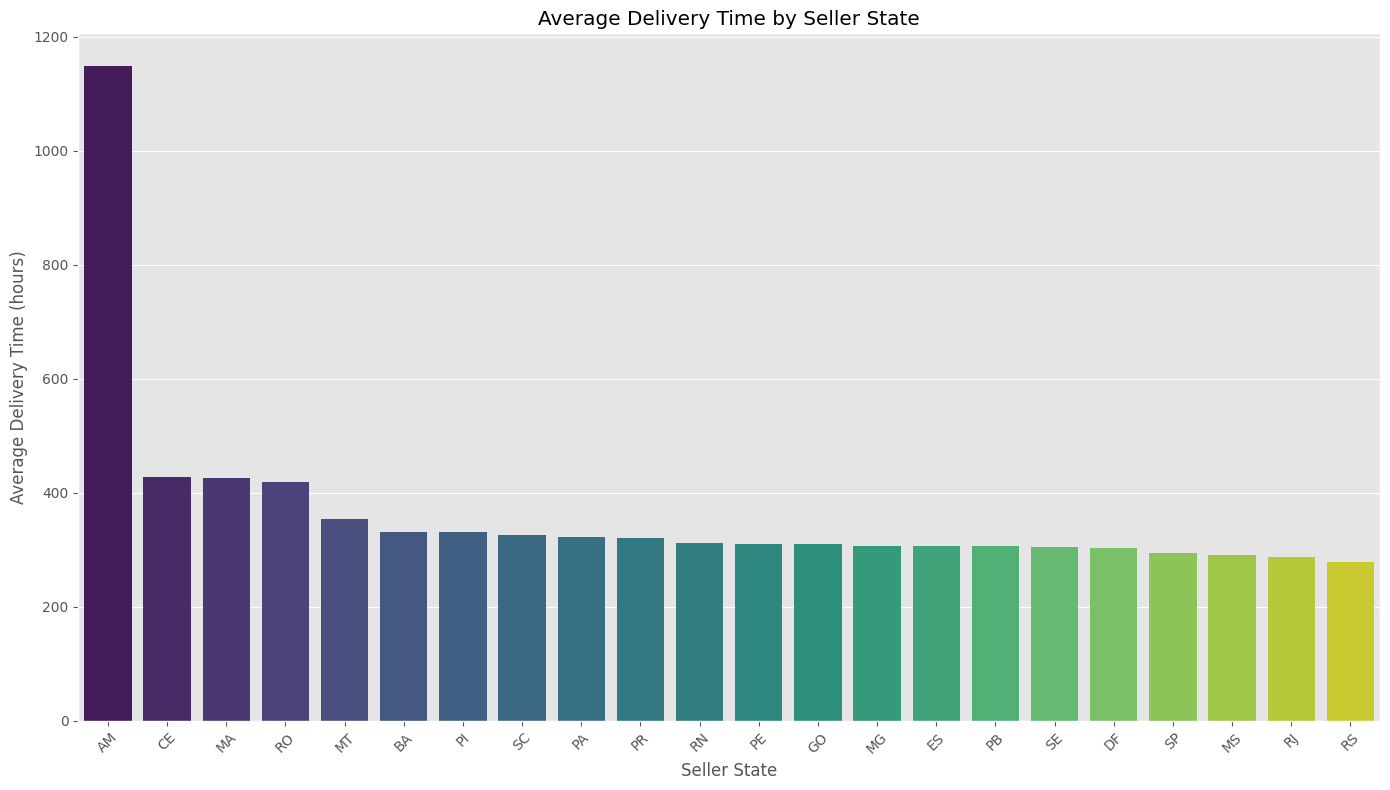

In [86]:
plt.figure(figsize=(14, 8))
sns.barplot(data=dist_data.sort_values('delievery_time' , ascending=False), x='seller_state', y='delievery_time', palette='viridis')

# Add labels and title
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Delivery Time (hours)')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
custo_data = distance_data.groupby('customer_state').agg({'delievery_time': 'mean' ,  'distance_km':'mean' , 'freight_value':'mean'  }).reset_index()
# distance_data.columns

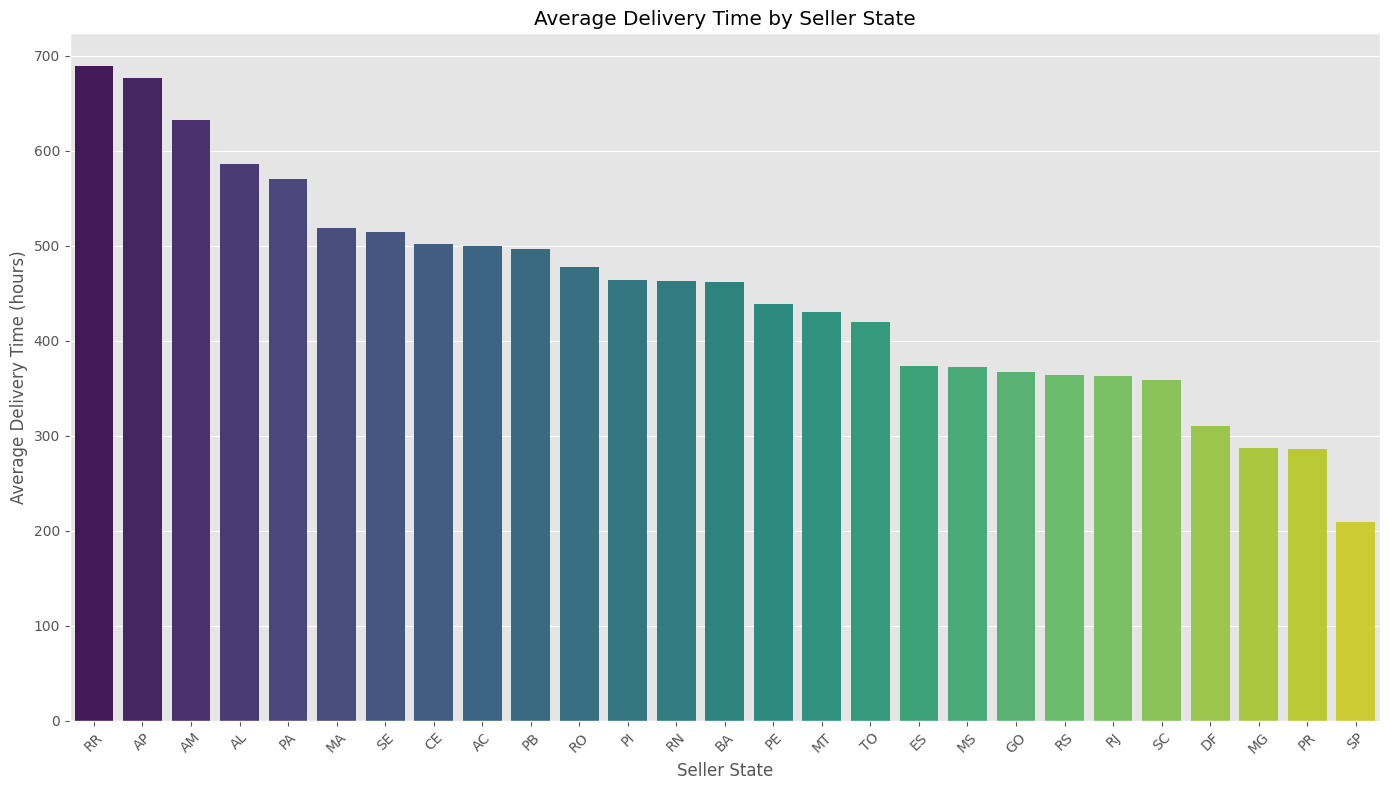

In [88]:
plt.figure(figsize=(14, 8))
sns.barplot(data=custo_data.sort_values('delievery_time' , ascending=False), x='customer_state', y='delievery_time', palette='viridis')

# Add labels and title
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Delivery Time (hours)')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

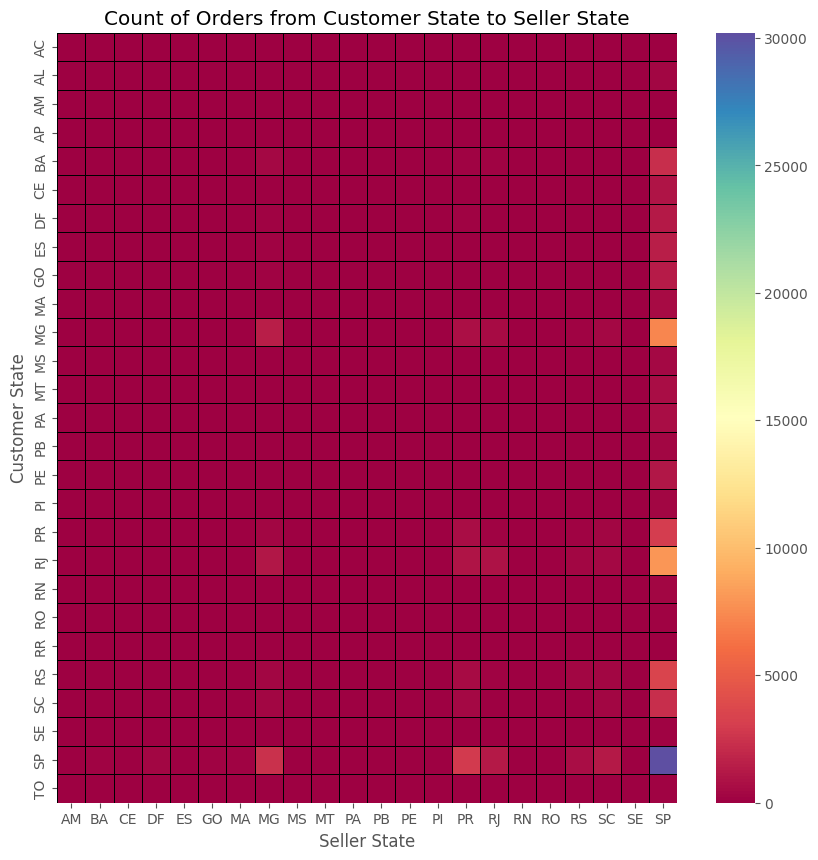

In [89]:
unique_orders = distance_data.loc[~distance_data['order_id'].duplicated(), 
                                  ['order_id', 'customer_city', 'customer_state', 
                                   'seller_city', 'seller_state', 'customer_unique_id']]

# Display the unique orders

# Create the pivot table
state_to_state_pivot = unique_orders.pivot_table(
    index='customer_state', 
    columns='seller_state', 
    values='order_id', 
    aggfunc='count', 
    fill_value=0
)

plt.figure(figsize=(10, 10))
sns.heatmap(state_to_state_pivot, annot=False, fmt="d", cmap="Spectral", linewidths=.5, linecolor='black')
plt.title('Count of Orders from Customer State to Seller State')
plt.xlabel('Seller State')
plt.ylabel('Customer State')
plt.show()

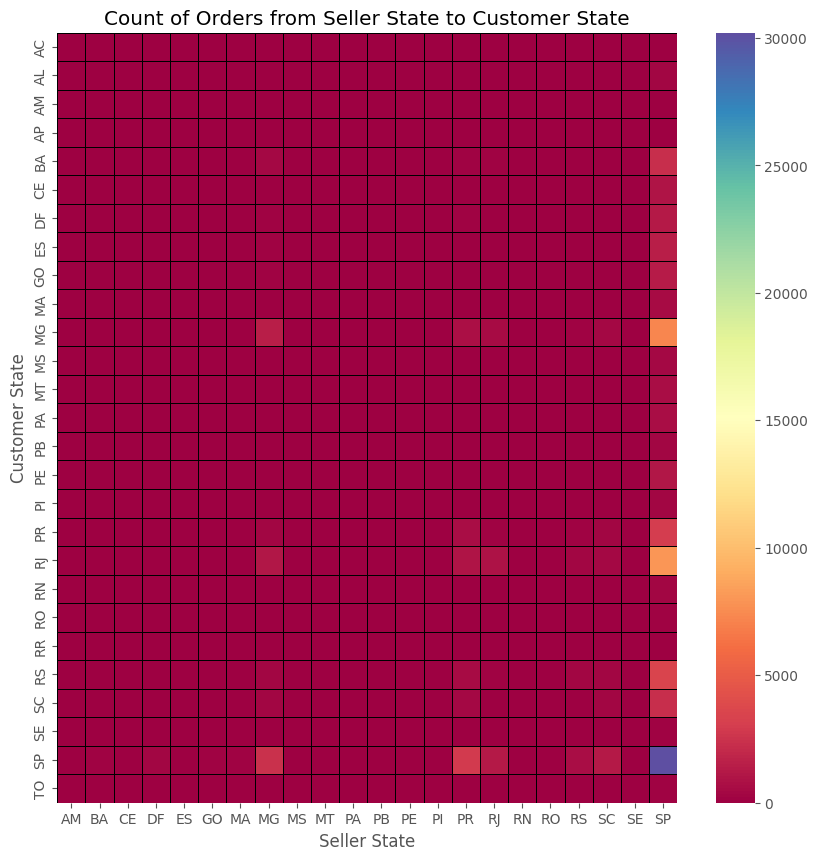

In [90]:
unique_orders = distance_data.loc[~distance_data['order_id'].duplicated(), 
                                  ['order_id', 'customer_city', 'customer_state', 
                                   'seller_city', 'seller_state', 'customer_unique_id']]

# Display the unique orders

# Create the pivot table
state_to_state_pivot = unique_orders.pivot_table(
    index='customer_state', 
    columns='seller_state', 
    values='order_id', 
    aggfunc='count', 
    fill_value=0
)

plt.figure(figsize=(10, 10))
sns.heatmap(state_to_state_pivot, annot=False, fmt="d", cmap="Spectral", linewidths=.5, linecolor='black')
plt.title('Count of Orders from Seller State to Customer State')
plt.xlabel('Seller State')
plt.ylabel('Customer State')
plt.show()

In [91]:
state_to_state_pivot

seller_state    AM   BA  CE   DF  ES   GO   MA    MG  MS  MT  ...   PE  PI  \
customer_state                                                ...            
AC               0    1   0    0   0    1    1    10   1   0  ...    0   0   
AL               1    9   2    4   0    6    4    35   0   0  ...    9   0   
AM               0    1   1    0   0    2    1    12   0   0  ...    0   0   
AP               0    2   0    0   0    1    1     3   0   0  ...    1   0   
BA               0   66   2   33  22    7   10   359   3   4  ...   26   0   
CE               0   14   9   12   3   12    9    72   0   2  ...   17   1   
DF               0   12   1   46   1   27   25   170   4   6  ...   14   0   
ES               0   11   3   18   7    5   13   168   0   2  ...   17   0   
GO               0    8   1   27   3   29   16   146   1  10  ...   12   0   
MA               1   16   2    8   2    9   14    58   0   3  ...    5   1   
MG               1   51   3   94  43   82   31  1479   3  20  ...   62   2   
MS               0    2   1    7   0    8    3    61   0   5  ...    2   0   
MT               0    5   2    8   6    9    4    50   2   6  ...    1   0   
PA               0    8   3   11   2   10    5    82   0   3  ...    5   0   
PB               0   10   0    7   0    7    4    47   0   2  ...    8   1   
PE               0   32   7    9   6   10   21   109   0   6  ...   23   1   
PI               0    9   3    8   2    2    5    31   0   0  ...    8   1   
PR               0   10   4   25  15    9    9   351   3   8  ...    9   1   
RJ               0   83  10   89  57   55   41  1093   8  13  ...   42   0   
RN               0    8   1    6   1    1    3    27   0   1  ...    4   0   
RO               0    2   1    0   1    1    0    14   0   2  ...    3   0   
RR               0    1   0    0   0    0    0     2   0   0  ...    0   0   
RS               0   22   0   21  18   11   17   268   1   6  ...   13   0   
SC               0   13   2   19  12   10   19   247   1   5  ...    9   1   
SE               0    8   3    3   0    0    5    34   0   0  ...    7   0   
SP               0  137  23  295  98  121  123  2456  16  30  ...  104   2   
TO               0    2   0    5   2    5    2    16   0   0  ...    1   0   

seller_state      PR    RJ  RN  RO   RS    SC  SE     SP  
customer_state                                            
AC                 1     0   0   0    2     4   0     56  
AL                35    11   1   0   10    11   0    252  
AM                11     8   0   0    5     4   0     99  
AP                 2     1   0   0    3     4   0     49  
BA               143   133   5   1   40    77   0   2261  
CE                63    51   3   0   12    21   0    949  
DF               142    80   1   0   42    69   0   1239  
ES               108    94   0   1   24    50   1   1441  
GO                84   101   0   0   22    55   1   1376  
MA                40    27   0   0   14    20   0    479  
MG               807   542   1   0  181   425   0   7285  
MS                55    32   0   0   16    31   0    467  
MT                59    29   0   0   22    26   0    638  
PA                52    37   1   0   20    19   1    663  
PB                40    24   2   0    8    18   0    324  
PE                85    88   0   0   17    38   0   1111  
PI                25    21   0   0   11    19   0    320  
PR               702   197   4   1  136   283   1   3044  
RJ               951   917   2   2  242   462   1   8001  
RN                19    22  21   0    8    14   0    325  
RO                17    13   0   0    9     9   0    163  
RR                 5     0   0   0    0     0   0     30  
RS               570   195   4   1  278   286   0   3522  
SC               385   112   1   0  113   254   0   2270  
SE                20    18   0   1    8    15   0    206  
SP              2892  1294   5   6  650  1295   2  30209  
TO                15    12   0   0    4    11   0    194  

[27 rows x 22 columns]

In [92]:
flattened = state_to_state_pivot.stack().reset_index()
flattened.columns = ['customer_state', 'seller_state', 'order_count']
flattened.sort_values('order_count' , ascending=False).head(10).reset_index().drop('index' , axis=1)

customer_state seller_state  order_count
0             SP           SP        30209
1             RJ           SP         8001
2             MG           SP         7285
3             RS           SP         3522
4             PR           SP         3044
5             SP           PR         2892
6             SP           MG         2456
7             SC           SP         2270
8             BA           SP         2261
9             MG           MG         1479

In [93]:
distance_data_grp = distance_data.groupby('order_id').agg({'delievery_time':'first' , })
# distance_data['order_id'].value_counts()

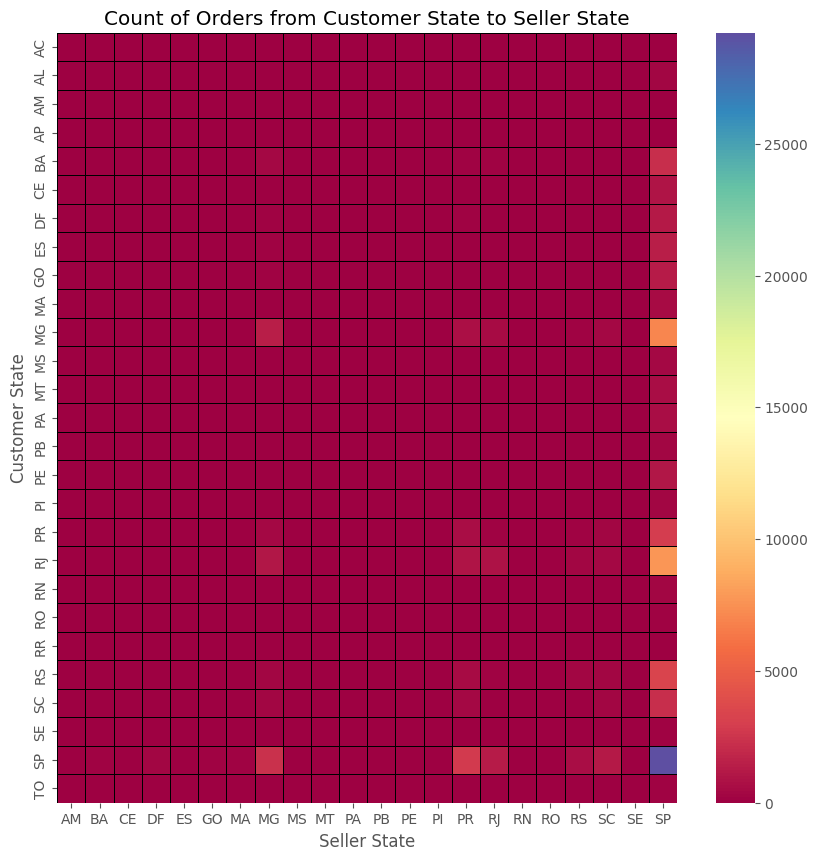

In [94]:
unique_orders = distance_data.loc[~distance_data['customer_unique_id'].duplicated(), 
                                  ['order_id', 'customer_city', 'customer_state', 
                                   'seller_city', 'seller_state', 'customer_unique_id']]


# Display the unique orders

# Create the pivot table
state_to_state_pivot = unique_orders.pivot_table(
    index='customer_state', 
    columns='seller_state', 
    values='customer_unique_id', 
    aggfunc='count',
    fill_value=0
)


plt.figure(figsize=(10, 10))
sns.heatmap(state_to_state_pivot, annot=False, fmt="d", cmap="Spectral", linewidths=.5, linecolor='black')
plt.title('Count of Orders from Customer State to Seller State')
plt.xlabel('Seller State')
plt.ylabel('Customer State')
plt.show()

In [95]:
distance_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'weekday', 'day', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'volume',
       'delievery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'distance_km'],
      dtype='object')

In [96]:
distance_data['total'] = distance_data['price'] + distance_data['freight_value']

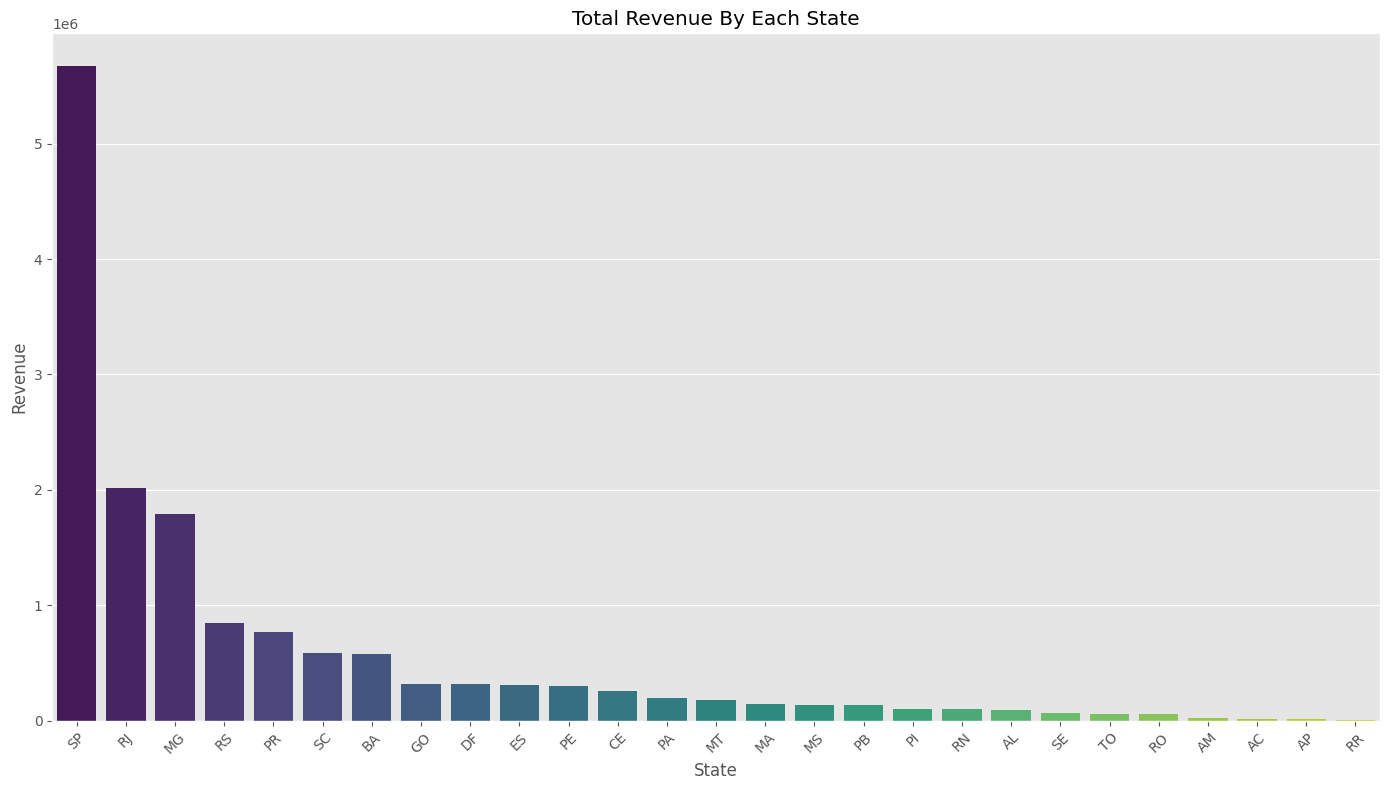

In [97]:
revenue_by_state = distance_data.groupby('customer_state').agg({'total' : 'sum'}).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=revenue_by_state.sort_values('total' , ascending=False), x='customer_state', y='total', palette='viridis')
# Add labels and title
plt.title('Total Revenue By Each State')
plt.xlabel('State')
plt.ylabel('Revenue')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

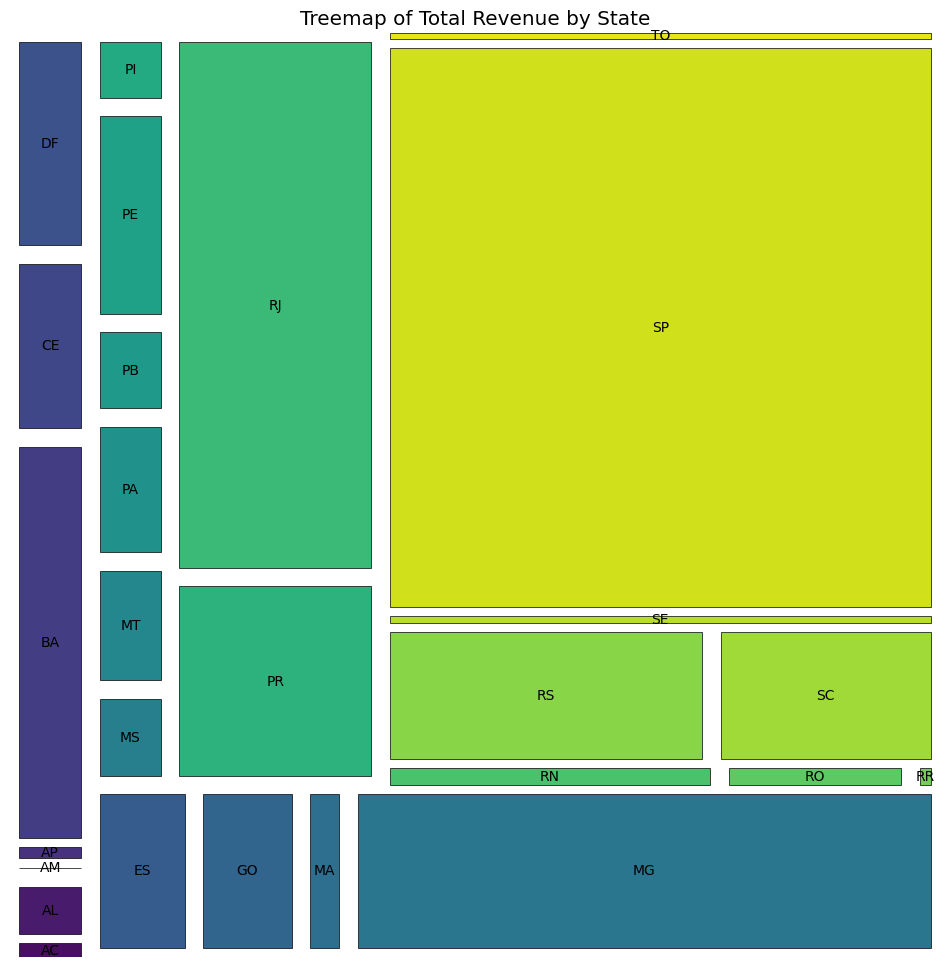

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Group and aggregate the data
state_totals = distance_data.groupby('customer_state').agg({'total': 'sum'}).reset_index()

# Prepare data for squarify

sizes = state_totals['total']
labels = state_totals['customer_state']

# Create a Treemap
plt.figure(figsize=(12, 12))
squarify.plot(sizes=sizes, label=labels, alpha=1,  ec= 'black', pad=0.21,color=sns.color_palette('viridis', len(sizes)))
plt.title('Treemap of Total Revenue by State')
plt.axis('off')  # Turn off the axis
plt.show()

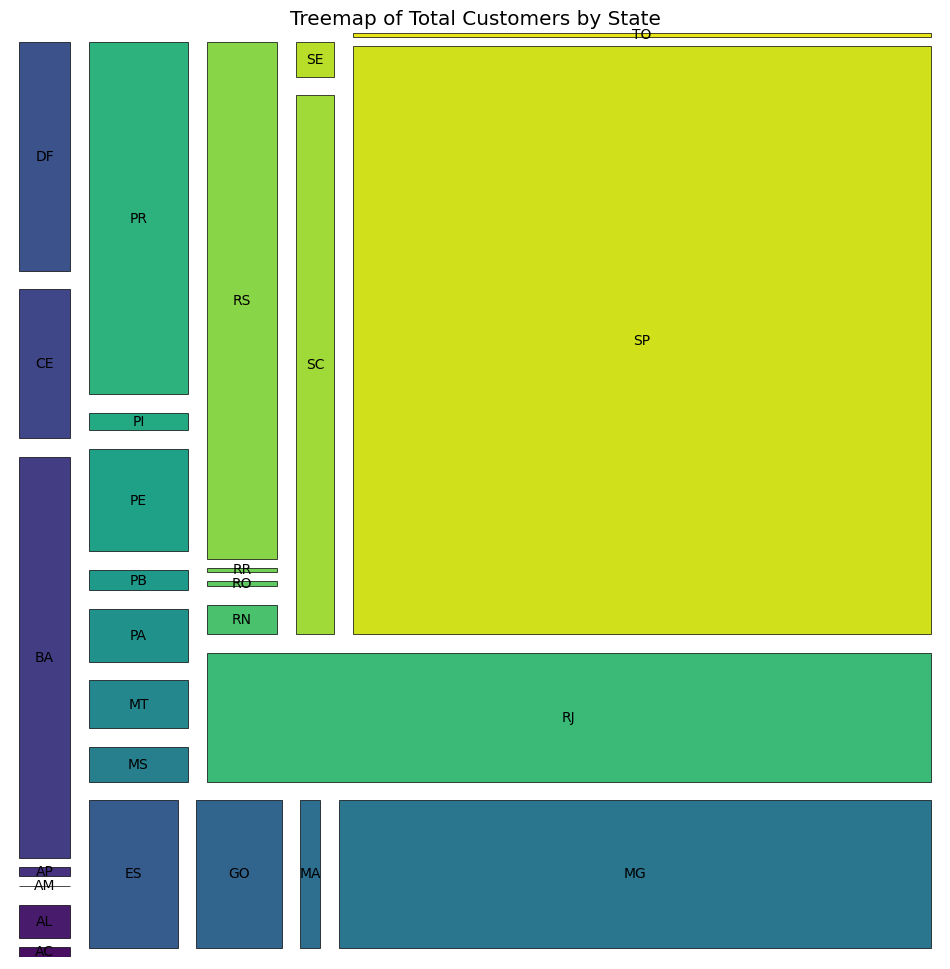

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Group and aggregate the data
state_totals = distance_data.groupby('customer_state').agg({'customer_unique_id': 'nunique'}).reset_index()

# Prepare data for squarify

sizes = state_totals['customer_unique_id']
labels = state_totals['customer_state']

# Create a Treemapm
plt.figure(figsize=(12, 12))
squarify.plot(sizes=sizes, label=labels, alpha=1,  ec= 'black', pad=0.21,color=sns.color_palette('viridis', len(sizes)))
plt.title('Treemap of Total Customers by State')
plt.axis('off')  # Turn off the axis
plt.show()

In [100]:
some = distance_data[['order_id' , 'seller_city' , 'seller_state', 'product_category_name', 'seller_id' , 'price' , 'freight_value' ,'customer_unique_id', 'customer_city','customer_state' ]]

In [101]:
# some[ some['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8' ]
data_cust_sell = some.groupby('order_id').agg(
    {
         'seller_city' :'first' , 'seller_city':'first' , 'seller_id' : 'first' , 'price' :'sum', 'freight_value' :'sum' 
        ,'customer_unique_id' : 'first' , 'customer_city':'first' , 'customer_state':'first'
    }
)
data_cust_sell = data_cust_sell.reset_index()

In [102]:
data_cust_sell['total'] = data_cust_sell['price'] + data_cust_sell['freight_value']

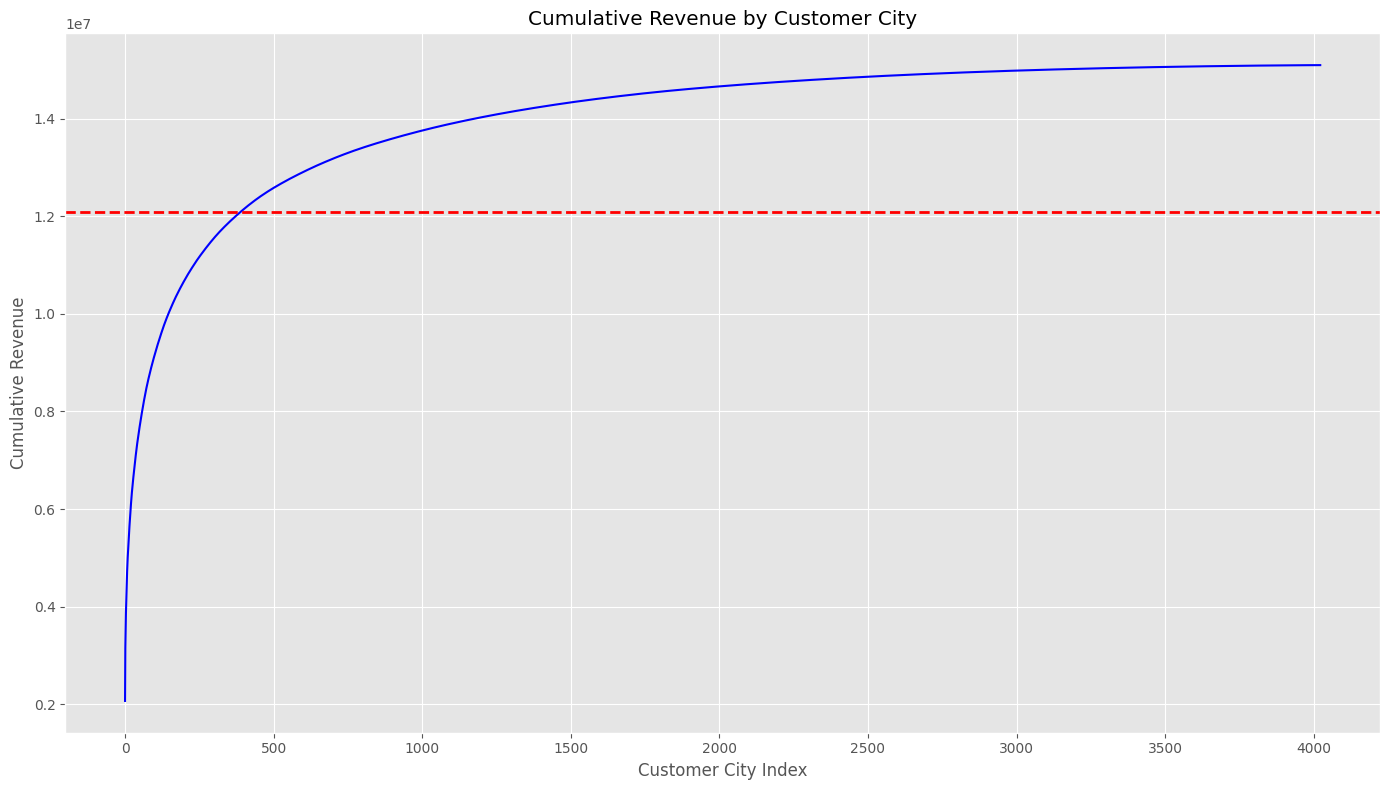

387 Cities gives 80% of the revenue out of total 1474 cities in the top 3 three state


In [103]:
impstate_data = data_cust_sell[data_cust_sell['customer_state'].isin(['SP','RJ','MG'])]
impstate_data = data_cust_sell.groupby('customer_city').agg({ 'customer_unique_id':'nunique', 'total':'sum' , 'order_id':'nunique' ,'customer_state':'first'   })
impstate_data.columns  =['customer_count', 'Revenue', 'order_count' ,'Customer_state']
impstate_data = impstate_data.sort_values(['Revenue','customer_count'], ascending=False ).reset_index()
impstate_data = impstate_data.reset_index()
impstate_data

revenue_top_80pct = impstate_data['Revenue'].sum() * 0.8

# Plot cumulative plot
plt.figure(figsize=(14, 8))
plt.plot(impstate_data.index, impstate_data['Revenue'].cumsum(), linestyle='-', color='b')
plt.axhline(revenue_top_80pct, color='r', linestyle='--', linewidth=2, label='80% revenue' )
 
plt.title('Cumulative Revenue by Customer City')
plt.xlabel('Customer City Index')
plt.ylabel('Cumulative Revenue')
plt.grid(True)
# plt.xticks(impstate_data.index, impstate_data['customer_city'], rotation=90)  # Optionally add city names as xticks
plt.tight_layout()
plt.show()

l = len(impstate_data[(impstate_data['Revenue'].cumsum() <= revenue_top_80pct)])
print(l , 'Cities gives 80% of the revenue out of total 1474 cities in the top 3 three state' )

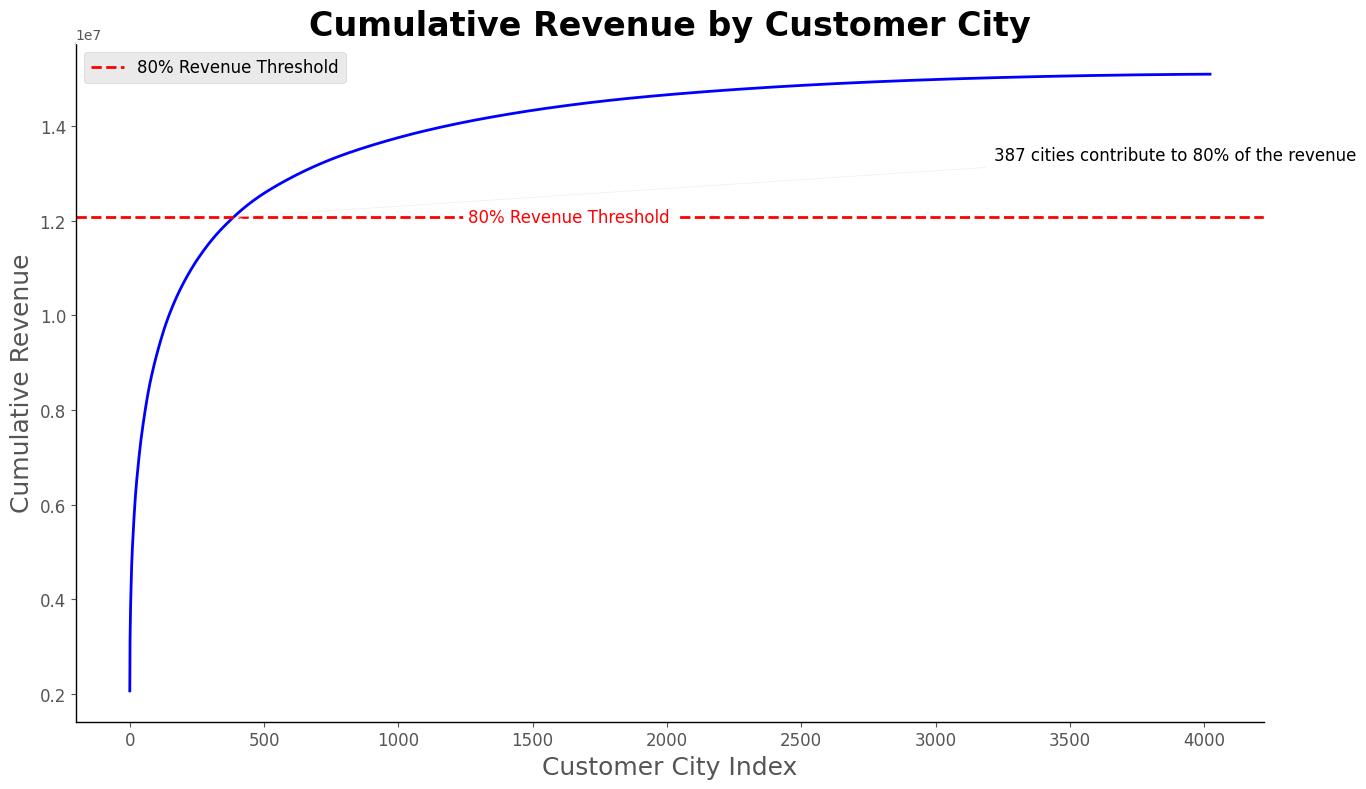

387 cities contribute to 80% of the revenue out of total 4023 cities in the top 3 states


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
impstate_data = data_cust_sell[data_cust_sell['customer_state'].isin(['SP','RJ','MG'])]
impstate_data = data_cust_sell.groupby('customer_city').agg({ 'customer_unique_id':'nunique', 'total':'sum' , 'order_id':'nunique' ,'customer_state':'first'   })
impstate_data.columns  =['customer_count', 'Revenue', 'order_count' ,'Customer_state']
impstate_data = impstate_data.sort_values(['Revenue','customer_count'], ascending=False ).reset_index()
impstate_data = impstate_data.reset_index()
impstate_data

revenue_top_80pct = impstate_data['Revenue'].sum() * 0.8

# Plot cumulative plot
plt.figure(figsize=(14, 8))

# Cumulative Revenue plot
sns.lineplot(data=impstate_data, x=impstate_data.index, y=impstate_data['Revenue'].cumsum(), color='b', linewidth=2)

# 80% revenue line
plt.axhline(revenue_top_80pct, color='r', linestyle='--', linewidth=2, label='80% Revenue Threshold')

# Annotations
plt.text(len(impstate_data) * 0.5, revenue_top_80pct, '80% Revenue Threshold', color='r', fontsize=12, va='center', ha='right', backgroundcolor='w')
plt.annotate(f'{len(impstate_data[impstate_data["Revenue"].cumsum() <= revenue_top_80pct])} cities contribute to 80% of the revenue',
             xy=(len(impstate_data[impstate_data["Revenue"].cumsum() <= revenue_top_80pct]), revenue_top_80pct),
             xytext=(len(impstate_data) * 0.8, revenue_top_80pct * 1.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black', backgroundcolor='w')

# Customizing the plot
plt.title('Cumulative Revenue by Customer City', fontsize=24, fontweight='bold')
plt.xlabel('Customer City Index', fontsize=18)
plt.ylabel('Cumulative Revenue', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('white')
plt.legend(fontsize=12)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.tight_layout()

# Display the plot
plt.show()

# Print the number of cities contributing to 80% revenue
l = len(impstate_data[(impstate_data['Revenue'].cumsum() <= revenue_top_80pct)])
print(f"{l} cities contribute to 80% of the revenue out of total {len(impstate_data)} cities in the top 3 states")


In [105]:
387/4023

0.09619686800894854

* **129 Cities gives 80% of the revenue out of total 1474 cities in the top 3 three state**


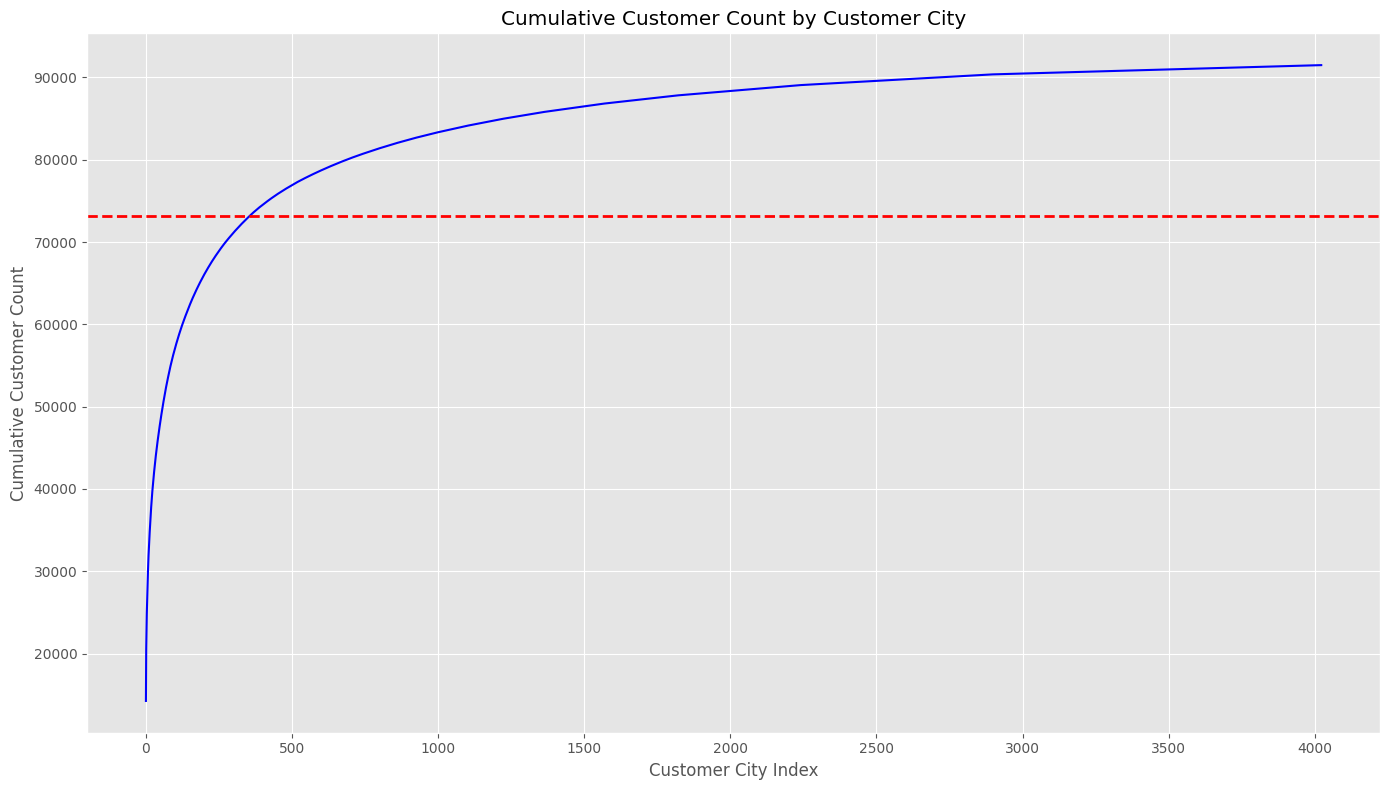

In [106]:
impstate_data = data_cust_sell[data_cust_sell['customer_state'].isin(['SP','RJ','MG'])]
impstate_data = data_cust_sell.groupby('customer_city').agg({ 'customer_unique_id':'nunique', 'total':'sum' , 'order_id':'nunique' ,'customer_state':'first'   })
impstate_data.columns  =['customer_count', 'Revenue', 'order_count' ,'Customer_state']
impstate_data = impstate_data.sort_values(['customer_count','Revenue'], ascending=False ).reset_index()
impstate_data = impstate_data.reset_index()
impstate_data



customers_80pct = impstate_data['customer_count'].sum() * 0.8
plt.figure(figsize=(14, 8))
plt.plot(impstate_data.index, impstate_data['customer_count'].cumsum(), linestyle='-', color='b')
plt.axhline(y=customers_80pct, color='r', linestyle='--', linewidth=2, label='80% revenue' )


plt.title('Cumulative Customer Count by Customer City')
plt.xlabel('Customer City Index')
plt.ylabel('Cumulative Customer Count')
plt.grid(True)
# plt.xticks(impstate_data.index, impstate_data['customer_city'], rotation=90)  # Optionally add city names as xticks
plt.tight_layout()
plt.show()

In [107]:
customers_80pct = impstate_data['customer_count'].sum() * 0.8
l = len(impstate_data[(impstate_data['customer_count'].cumsum() <= customers_80pct)])
print(l , 'Cities gives 80% of customers out of total 1474 cities in the top 3 three state' )

356 Cities gives 80% of customers out of total 1474 cities in the top 3 three state


### for products same thing

In [108]:
product_data = distance_data[distance_data['customer_state'].isin(['SP','RJ','MG'])]
product_data = product_data[['product_id' , 'product_category_name','price' , 'freight_value',  'customer_state' ,  'customer_city']].copy()
# product_data = distance_data.groupby('product_id').agg( { 'product_category_name':'first' , 'price':'sum','freight_value':'sum','customer_state':'count'  } )

# product_data[product_data['product_id'] == 'aca2eb7d00ea1a7b8ebd4e68314663af']
product_data['total'] = product_data['price'] + product_data['freight_value']
product_data = product_data.groupby('product_id').agg({'total':'sum'}).reset_index()
product_data.columns=['product_id','Revenue']
product_data

product_id  Revenue
0      00088930e925c41fd95ebfe695fd2655   143.83
1      0009406fd7479715e4bef61dd91f2462   242.10
2      000d9be29b5207b54e86aa1b1ac54872   218.27
3      0011c512eb256aa0dbbb544d8dffcf6e    67.80
4      00126f27c813603687e6ce486d909d01   262.24
...                                 ...      ...
24519  fff1059cd247279f3726b7696c66e44e   106.31
24520  fff6177642830a9a94a0f2cba5e476d1   127.01
24521  fff81cc3158d2725c0655ab9ba0f712c    97.89
24522  fff9553ac224cec9d15d49f5a263411f    43.85
24523  fffdb2d0ec8d6a61f0a0a0db3f25b441   180.60

[24524 rows x 2 columns]

NameError: name 'impstate_data' is not defined

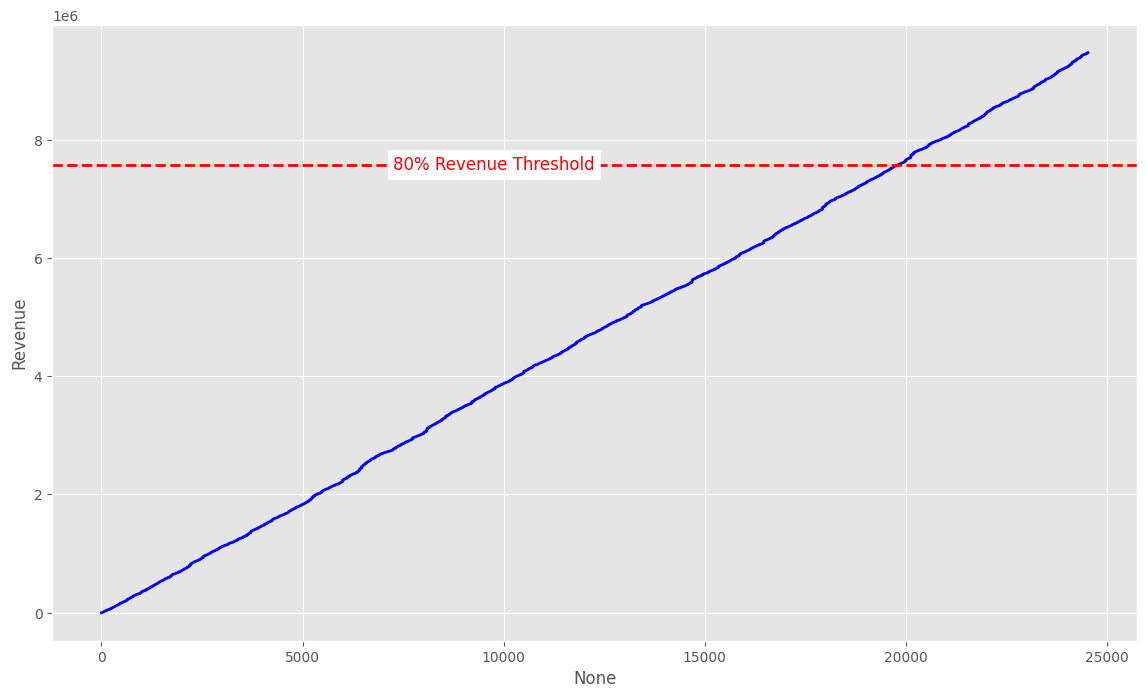

In [88]:
product_top_80pct = product_data['Revenue'].sum() * 0.8

# Plot cumulative plot
plt.figure(figsize=(14, 8))

# Cumulative Revenue plot
sns.lineplot(data=product_data, x=product_data.index, y=product_data['Revenue'].cumsum(), color='b', linewidth=2)

# 80% revenue line
plt.axhline(product_top_80pct, color='r', linestyle='--', linewidth=2, label='80% Revenue Threshold')

# Annotations
plt.text(len(product_data) * 0.5, product_top_80pct, '80% Revenue Threshold', color='r', fontsize=12, va='center', ha='right', backgroundcolor='w')
plt.annotate(f'{len(product_data[product_data["Revenue"].cumsum() <= product_top_80pct])} product contribute to 80% of the revenue',
             xy=(len(product_data[product_data["Revenue"].cumsum() <= product_top_80pct]), product_top_80pct),
             xytext=(len(impstate_data) * 0.8, revenue_top_80pct * 1.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black', backgroundcolor='w'

)


# Customizing the plot
plt.title('Cumulative Revenue by products', fontsize=16, fontweight='bold')
plt.xlabel('product Index', fontsize=14)
plt.ylabel('Cumulative Revenue', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('white')
plt.legend(fontsize=12)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.tight_layout()

# Display the plot
plt.show()

# Print the number of cities contributing to 80% revenue
l = len(product_data[(product_data['Revenue'].cumsum() <= product_top_80pct)])
print(f"{l} cities contribute to 80% of the revenue out of total {len(product_data)} cities in the top 3 states")


In [ ]:
pd.read_csv('./kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

In [89]:
olist_sellers_dataset['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

In [90]:
olist_orders_dataset_new2 = olist_orders_dataset_new[ olist_orders_dataset_new['time-elasped-hours'] < right_outlier ]
olist_orders_dataset_new2['time-elasped-hours'].describe()

count    91274.000000
mean       264.610490
std        145.582861
min         12.801944
25%        154.867708
50%        237.559167
75%        347.550208
max        697.733611
Name: time-elasped-hours, dtype: float64

<Axes: xlabel='time-elasped-hours', ylabel='Count'>

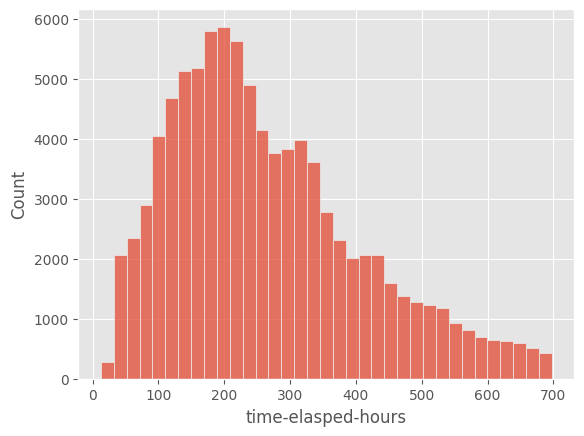

In [91]:
sns.histplot( data=olist_orders_dataset_new2 , x = 'time-elasped-hours', bins=35 )

over 95% of the delievery happens in the 0 to 700 hours.

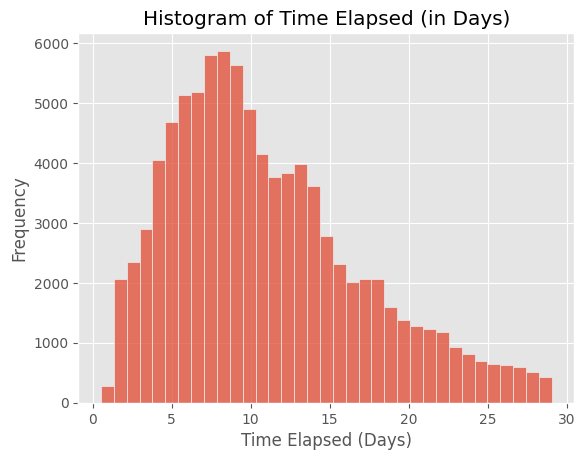

In [92]:
# Assuming olist_orders_dataset_new2['time-elasped-hours']/24 contains your data
sns.histplot(x=olist_orders_dataset_new2['time-elasped-hours']/24, bins=35)
# Customizing labels and title
plt.xlabel('Time Elapsed (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Elapsed (in Days)')
# Display the plot
plt.show()

## Insights

* Around 87% of the delievery happened in 20 days.
* Sales was increasing in 2017 and static in 2018.
* 24 Nov 2017 recorded highes sales with recored 1166, as it was Black Friday Sales.
* More Information will come when I will be joining this data with other tabels, as well.

In [93]:
# olist_customers_dataset = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
# olist_orders_dataset = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
# olist_order_items_dataset = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
# olist_geolocation_dataset = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
# olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

In [94]:
olist_customers_dataset.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [95]:
olist_orders_dataset.head()

index                          order_id                       customer_id  \
0      0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  weekday  day  
0           2017-10-18 00:00:00        1    2  
1           2018-08-13 00:00:00        2   24  
2           2018-09-04 00:00:00        3    8  
3           2017-12-15 00:00:00        6   18  
4           2018-02-26 00:00:00        2   13

In [96]:
product_dataset = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv'

In [ ]:
product_dataset.info()

In [97]:
product_dataset['product_category_name'].value_counts()

NameError: name 'product_dataset' is not defined

In [98]:
category_name_english = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv'

In [99]:
product_details = pd.merge(product_dataset,category_name_english , on='product_category_name',how='inner')
product_details['product_area'] = product_details['product_length_cm'] * product_details['product_width_cm']
product_details = product_details[['product_id' , 'product_category_name_english' , 'product_weight_g'  ,'product_area']]

NameError: name 'product_dataset' is not defined

In [100]:
product_details

NameError: name 'product_details' is not defined

In [101]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [102]:
order_details = pd.merge( olist_orders_dataset,olist_order_items_dataset,how='inner',on='order_id' )

In [103]:
order_details = order_details[[ 'order_id' , 'order_purchase_timestamp', 'order_delivered_customer_date' , 'product_id' , 'price' , 'freight_value' ]]

In [104]:
order_details

order_id order_purchase_timestamp  \
0       e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1       53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2       47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3       949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4       ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   
...                                  ...                      ...   
111747  63943bddc261676b46f01ca7ac2f7bd8      2018-02-06 12:58:58   
111748  83c1379a015df1e13d02aae0204711ab      2017-08-27 14:46:43   
111749  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
111750  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
111751  66dea50a8b16d9b4dee7af250b4be1a5      2018-03-08 20:57:30   

       order_delivered_customer_date                        product_id  \
0                2017-10-10 21:25:13  87285b34884572647811a353c7ac498a   
1                2018-08-07 15:27:45  595fac2a385ac33a80bd5114aec74eb8   
2                2018-08-17 18:06:29  aa4383b373c6aca5d8797843e5594415   
3                2017-12-02 00:28:42  d0b61bfb1de832b15ba9d266ca96e5b0   
4                2018-02-16 18:17:02  65266b2da20d04dbe00c5c2d3bb7859e   
...                              ...                               ...   
111747           2018-02-28 17:37:56  f1d4ce8c6dd66c47bbaa8c6781c2a923   
111748           2017-09-21 11:24:17  b80910977a37536adeddd63663f916ad   
111749           2018-01-25 23:32:54  d1c427060a0f73f6b889a5c7c61f2ac4   
111750           2018-01-25 23:32:54  d1c427060a0f73f6b889a5c7c61f2ac4   
111751           2018-03-16 13:08:30  006619bbed68b000c8ba3f8725d5409e   

         price  freight_value  
0        29.99           8.72  
1       118.70          22.76  
2       159.90          19.22  
3        45.00          27.20  
4        19.90           8.72  
...        ...            ...  
111747  174.90          20.10  
111748  205.99          65.02  
111749  179.99          40.59  
111750  179.99          40.59  
111751   68.50          18.36  

[111752 rows x 6 columns]

In [105]:
order_full_data = pd.merge(order_details,product_details ,on='product_id' , how='inner')

NameError: name 'product_details' is not defined

In [106]:
order_full_data.info()

NameError: name 'order_full_data' is not defined

In [107]:
order_full_data.isna().sum(axis=0)

NameError: name 'order_full_data' is not defined

In [108]:
order_full_data.dropna(inplace=True)

NameError: name 'order_full_data' is not defined

In [109]:
order_full_data.isna().sum(axis=0)

NameError: name 'order_full_data' is not defined

In [110]:
sns.scatterplot(order_full_data,x='product_area' , y='product_weight_g')

NameError: name 'order_full_data' is not defined

In [111]:
from scipy.stats import pearsonr

# Sample data
A = order_full_data['product_area']
B = order_full_data['product_weight_g']

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(A, B)
print(f"Pearson correlation coefficient between A and B: {correlation_coefficient}")
print(f"P-value: {p_value}")

NameError: name 'order_full_data' is not defined

Pearson correlation is positive but not very large.

In [112]:
order_full_data['order_purchase_timestamp'] = pd.to_datetime( order_full_data['order_purchase_timestamp'] )
order_full_data['order_delivered_customer_date']  = pd.to_datetime( order_full_data['order_delivered_customer_date'] )
order_full_data['order_time_in_hr'] = order_full_data['order_delivered_customer_date'] - order_full_data['order_purchase_timestamp']
order_full_data['order_time_in_hr'] = order_full_data['order_time_in_hr'].apply(lambda x : x.total_seconds()/3600)

NameError: name 'order_full_data' is not defined

In [113]:
order_full_data.head()

NameError: name 'order_full_data' is not defined

In [114]:
sns.scatterplot(order_full_data,x='product_area' , y='order_time_in_hr')

# Sample data
A = order_full_data['product_area']
B = order_full_data['order_time_in_hr']

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(A, B)
print(f"Pearson correlation coefficient between A and B: {correlation_coefficient}")
print(f"P-value: {p_value}")

NameError: name 'order_full_data' is not defined

In [115]:
sns.scatterplot(order_full_data,x='product_weight_g' , y='order_time_in_hr')

NameError: name 'order_full_data' is not defined

In [116]:
sns.scatterplot(order_full_data,x='product_area' , y='order_time_in_hr')

# Sample data
A = order_full_data['product_weight_g']
B = order_full_data['order_time_in_hr']

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(A, B)
print(f"Pearson correlation coefficient between A and B: {correlation_coefficient}")
print(f"P-value: {p_value}")

NameError: name 'order_full_data' is not defined

In [117]:
order_full_data.head()

NameError: name 'order_full_data' is not defined

In [118]:
category_wise_order = order_full_data.groupby('product_category_name_english').agg({'product_area':['min','max','mean'] , 'product_weight_g':['min','max','mean'] , 'order_time_in_hr':['min','max','mean'], 'product_id' : 'count'   , 'price':'mean' })

NameError: name 'order_full_data' is not defined

In [119]:
category_wise_order.columns = ['_'.join(col).strip() for col in category_wise_order.columns.values]
print("\nDataFrame with Single Index columns:")
category_wise_order

NameError: name 'category_wise_order' is not defined

In [120]:
category_wise_order.to_csv( 'category_wise_info.csv', index=True )

NameError: name 'category_wise_order' is not defined

Most Popular categories.

In [121]:
category_wise_order.sort_values( 'product_id_count' , ascending=False )[['product_id_count']].head(10)

NameError: name 'category_wise_order' is not defined

Least popular caetegories.

In [122]:
category_wise_order.sort_values( 'product_id_count' , ascending=False )[['product_id_count']].tail(10)

NameError: name 'category_wise_order' is not defined

Least weight categories

In [123]:
category_wise_order.sort_values( 'product_weight_g_mean' , ascending=True )[['product_weight_g_mean']].head(10)

NameError: name 'category_wise_order' is not defined

Max weight categories

In [124]:
category_wise_order.sort_values( 'product_weight_g_mean' , ascending=False )[['product_weight_g_mean']].head(10)

NameError: name 'category_wise_order' is not defined

highest time taking delievery category

In [125]:
category_wise_order[['order_time_in_hr_mean']].sort_values( 'order_time_in_hr_mean' , ascending=False ).head(10)

NameError: name 'category_wise_order' is not defined

In [126]:
category_wise_order[['order_time_in_hr_mean']].sort_values( 'order_time_in_hr_mean' , ascending=True ).head(10)

NameError: name 'category_wise_order' is not defined

In [127]:
cate_time = category_wise_order[['product_id_count' , 'order_time_in_hr_mean']].sort_values('product_id_count' , ascending=False ).head(20)
cate_time.to_csv('category_time.csv' ,index=True)
cate_time

NameError: name 'category_wise_order' is not defined

In [128]:
category_wise_order[['order_time_in_hr_mean' , 'product_id_count']].sort_values('order_time_in_hr_mean' , ascending=False )

NameError: name 'category_wise_order' is not defined

price wise category

In [129]:
category_wise_order[['price_mean' , 'product_id_count']].sort_values( 'price_mean' , ascending=False )

NameError: name 'category_wise_order' is not defined

In [130]:
category_wise_order[['price_mean' , 'product_id_count']].sort_values( 'price_mean' , ascending=True )

NameError: name 'category_wise_order' is not defined

In [131]:
category_wise_order[['price_mean' , 'product_id_count']].sort_values( 'product_id_count' , ascending=False )

NameError: name 'category_wise_order' is not defined